<center><br> <img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 200px;"></center><br>

<img src="https://i.pinimg.com/originals/2f/63/0c/2f630c8ff0e603d2b159c169d368b7d0.jpg" style="width: 250px;margin-top: 30px;" align="left">
   <div><center><h1>Previsão do Nº de Sets dos Jogos do ATP na Suécia</h1></center></div>
   <div><center><h3>Projeto Aplicado para Ciência de Dados I</h3></center></div>
   <div><center><b>Docentes:</b> Diana Mendes <b>|</b> Sérgio Moro</center></div>
 <br>
    <div><center><h4>Grupo 2</h4></center></div>
    <div><center> André Silvestre Nº104532 <b>|</b> Diogo Catarino Nº104745</center></div>
    <div><center>Francisco Gomes Nº104944 <b> |</b> Rita Matos Nº104936 </center></div>
    <div><center><b>CDB1</b></center>
 <br>    
 <br>


<div style="background: linear-gradient(to right,#67C7ED, #0371B1,#0A6394); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

# Índice do Notebook


<ol style="list-style-type: upper-roman;font-weight: bold;">
  <li><span style = "font-weight: normal;"><a href="#1">Business Understanding</a></span></li>
  <li><span style = "font-weight: normal;"><a href="#1">Data Understanding</a></span></li>
  <li><span style = "font-weight: normal;"><a href="#2">Data Preparation</a></span></li>
  <li><span style = "font-weight: normal;"><a href="#3">Modeling</a></span></li>
  <li><span style = "font-weight: normal;"><a href="#4">Evaluation</a></span></li>
  <li><span style = "font-weight: normal;"><a href="#5">Deployment</a></span></li>
</ol>

<div style="background: linear-gradient(to right,#67C7ED, #0371B1,#0A6394); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>


# <a class='anchor' id='1'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#67C7ED, #0371B1,#0A6394); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>1 | Business & Data Understanding</b></h1></center>
</div>

## Informação Geral sobre o Dataset | Formulação do Problema

<br>

O conjunto de dados em análise diz respeito aos jogadores **ATP**, contendo informações de todos os jogos individuais disputados por cerca de **10 mil jogadores profissionais masculinos** (os **TOP 500 jogadores** que jogaram entre `28/03/1973` e 
`14/02/2022`)

<br>

| Nº | Variável | Descrição |
| :---: | :---: | :---: | 
| **0** | _ id | Identificador único de cada observação | 
| **1** | PlayerName | Nome do principal jogador da partida | 
| **2** | Born | Cidade e/ou país de onde o jogador é natural | 
| **3** | Height | Altura do jogador (em *cm*) |
| **4** | Hand | Mão possante do jogador e mãos utilizadas para executar o serviço | 
| **5** | LinkPlayer | Link do perfil do jogador no website do *ATP Tour* | 
| **6** | Tournament | Nome do torneio | 
| **7** | Location | Localização do torneio | 
| **8** | Date | Intervalo de datas em que se realizou o torneio | 
| **9** | Ground | Terreno em que é jogado o torneio (`Hard`, `Grass`, `Clay`, `Carpet`) | 
| **10** | Prize | Valor do prémio na moeda local | 
| **11** | GameRound | Fase do torneio em que o jogo está a ser disputado | 
| **12** | GameRank | Rank do jogador adversário | 
| **13** | Opponent | Nome do jogador adversário | 
| **14** | WL | Resultado do jogo (`W` - venceu, `L` - perdeu) | 
| **15** | Score | Distribuição dos resultados dos *sets* | 

<br>
<center><b>Figura 1 | </b> Tabela com a descrição das variáveis.</center> 
<br> 

<br>

<div style="background: linear-gradient(to right,#A40606,#D98324); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

**NOTA:** No enunciado do projeto refere que as variáveis a usar são: 
   - **Jogadores** (*Player & Opponent*): (1) altura, (2) país de naturalidade, (3) mão possante, (4) data de nascimento
   - **Jogos**: (5) torneio, (6) data do torneio, (7) tipo de piso, (8) prémio monetário, (9) round, e (10) nº de sets

> Assim sendo, notámos desde logo que não está presente no dataset a variável referente à **Data de Nascimento** dos jogadores,  pelo que iremos resolver a situação posteriormente.

<br>
<div style="background: linear-gradient(to right,#A40606,#D98324); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

<br>

---


### Questão Problema a responder

> Como podemos prever o `Nº de Sets` que decorreram em jogos da **Suécia**, sabendo aspetos ligados aos jogadores e torneios associados aos jogos?

---

## 📚 Import das Bibliotecas

In [1]:
# Bibliotecas que vamos usar no Projeto

## for data
import pandas as pd
import numpy as np
from tqdm import tqdm # Barra de Progresso

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## for explainer
from lime import lime_tabular
    
## plot style and warnings    
plt.style.use('ggplot')
from IPython.display import display # Allows the use of display() for DataFrames
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)  # Visualizar a informação toda

# Set Seed
import random
random.seed(123)

## 🧮 Importar Bases de Dados (.json)

In [2]:
# Import da base de dados em formato .json (lines=True -> uma observação em formato JSON em cada linha)
atp = pd.read_json('atpplayers.json', lines=True)

In [3]:
# Observações Aleatórias da base de dados de modo a ver a sua estrutura
atp.sample(2)

,_id,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score
314812,{'$oid': '624ab3592d9125acc75baea7'},Vladimir Ivanov,,NA,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/vladimir-ivanov/i067/player-activity?year=all&matchType=Singles,Sweden F2,Sweden,2011.05.09 - 2011.05.15,Clay,"$10,000",Round of 32,293,Timo Nieminen,L,46 26
729292,{'$oid': '624ab37dcca162cc85e56944'},Felipe Frias,,NA,null,https://www.atptour.com/en/players/felipe-frias/f837/player-activity?year=all&matchType=Singles,Sao Paulo,"Sao Paulo, Brazil",2012.01.02 - 2012.01.08,Hard,"$35,000",1st Round Qualifying,569,Bruno Santanna,L,36 26


In [4]:
# Indicar que os espaços são NaN
atp = atp.replace('', np.nan)

In [5]:
# Informação sobre os dados (Tipo de dados e Número de observações não-nulas)
atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308835 entries, 0 to 1308834
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   _id         1308835 non-null  object
 1   PlayerName  1308835 non-null  object
 2   Born        988083 non-null   object
 3   Height      1308835 non-null  object
 4   Hand        1308835 non-null  object
 5   LinkPlayer  1308835 non-null  object
 6   Tournament  1308835 non-null  object
 7   Location    1308835 non-null  object
 8   Date        1308835 non-null  object
 9   Ground      1308644 non-null  object
 10  Prize       1289699 non-null  object
 11  GameRound   1308835 non-null  object
 12  GameRank    1289599 non-null  object
 13  Oponent     1308828 non-null  object
 14  WL          1289578 non-null  object
 15  Score       1308674 non-null  object
dtypes: object(16)
memory usage: 159.8+ MB


> Verificamos já algumas variáveis com valores omissos, porém este valor ainda não certo, pois apenas estamos a considerar como `NaN` os espaços vazios.  

In [6]:
# Remover a coluna do '_id' e ´GameRank´ dado que não contém informação relevante para o projeto
# atp.drop(["_id",'GameRank'], axis=1, inplace=True)
atp.drop(["_id"], axis=1, inplace=True)

In [7]:
# Verificar duplicados e remover caso existam
print("Número de linhas duplicadas: ", atp.duplicated().sum(), '(', round(atp.duplicated().sum()/len(atp) * 100, 3) ,'%)')
atp.drop_duplicates(inplace=True)

Número de linhas duplicadas:  2830 ( 0.216 %)


In [8]:
# Confirmar que os duplicados foram eliminados (1308835 - 2830 = 1 306 005)
atp.shape

(1306005, 15)

---

In [9]:
# Guardar o dataset sem duplicados e com as colunas necessárias
atp.to_csv('df_atp1.csv', index= False)

---

# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#67C7ED, #0371B1,#0A6394); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 34px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>2 | Data Preparation</b></h1></center>
</div>

## 🧹 Limpeza dos Dados

A **Limpeza dos Dados** foi feita nos *Notebooks*: 

> **`1_LimpezaJogos_PACD1_Projeto_Grupo2_ATP-Suécia.ipynb`**

> **`2_LimpezaJogadores_PACD1_Projeto_Grupo2_ATP-Suécia.ipynb`**

**NOTA:** Neste sentido, para conseguir correr o código seguinte terá de correr primeiro os *notebooks* mencionados!

### Tabela com as variáveis Resultantes e a Criar

| Nº | Variável | Descrição | Tipo de Dado |
| :---: | :---: | :---: | :---: |
| **1** | Height_Player | Altura do jogador (em cm) | `int` |
| **2** | Age_Player | Idade que o jogador tem atualmente | `int` |
| **3** | Height_Opponent | Altura do oponente (em cm) | `int` |
| **4** | Age_Opponent | Idade que o oponente tem atualmente | `int` |
| **5** | RankDiff | Diferença do rank entre jogador principal e o oponente  | `int` |
| **6** | Tournament | Nome do torneio | `string` |
| **7** | Tournament_Start_Date | Data do começo do torneio | `datetype` |
| **8** | Tournament_End_Date | Data do fim do torneio | `datetype` |
| **9** | Prize | Valor do prémio do torneio (ajustado à inflaçáo e convertido para a mesma moeda) | `int` |
| **10** | N_Sets | Número de *sets* de uma partida | `int` |
| **11** | Sweden_Player | Variável binária (1 = Jogador é de origem sueca) | `int` |
| **12** | Sweden_Opponent | Variável binária (1 = Oponente é de origem sueca) | `int` |
| **13** | Continentes_Players | Nome do continete de origem do  jogador | `string` |
| **14** | Continentes_Opponents | Nome do continete de origem do oponente | `string` |
| **15** | Players_Asia | Variável binária (1 = jogador é asiático) | `int` |
| **16** | Players_Europe | Variável binária (1 = jogador é europeu) | `int` |
| **17** | Players_North America | Variável binária (1 = jogador é norte americano) | `int` |
| **18** | Players_Oceania | Variável binária (1 = jogador é oceânico) | `int` |
| **19** | Players_South America | Variável binária (1 = jogador é sul americano) | `int` |
| **20** | Opponents_Asia | Variável binária (1 = oponente é asiático) | `int` |
| **21** | Opponents_Europe | Variável binária (1 = oponente é europeu) | `int` |
| **22** | Opponents_North America	 | Variável binária (1 = oponente é norte americano) | `int` |
| **23** | Opponents_Oceania | Variável binária (1 = oponente é oceânico) | `int` |
| **24** | Opponents_South America | Variável binária (1 = oponente é sul americano) | `int` |
| **25** | Destro_Player | Variável binária (1 = jogador é destro) | `int` |
| **26** | Destro_Opponent | Variável binária (1 = oponente é destro) | `int` |
| **27** | Torneio_Enc | Nome do torneio (com *label encoding*) | `int` |
| **28** | Clay | Variável binária (1 = o tipo de terreno é Clay) | `int` |
| **29** | Hard | Variável binária (1 = o tipo de terreno é Hard) | `int` |
| **30** | GameRound_Enc | Fase do torneio (com label encoding) | `int` |
| **31** | Age_Player_Tournament | Idade que o jogar aquando do torneio disputado | `int` |
| **32** | Age_Opponent_Tournament | Idade que o oponente aquando do torneio disputado | `int` |
| **33** | Age_Difference | Diferença de idades entre o jogador e o oponente aquando do torneio | `int` |

<br>

<center><b>Figura 2 | </b> Tabela com a descrição das variáveis após o <em>Data Preparation</em>.</center> 
<br> 

In [10]:
# Import da Base de Dados Limpa e Visualização das 2 primeiras observações
atp_suecia = pd.read_csv('atp_suecia_unique.csv')
atp_suecia.head(2)

,PlayerName,Link_Player,Born_Player,Height_Player,Hand_Player,Birthdate_Player,Age_Player,Opponent,Link_Opponent,Born_Opponent,...,Birthdate_Opponent,Age_Opponent,RankDiff,Tournament,Tournament_Start_Date,Tournament_End_Date,Prize,Ground,GameRound,N_Sets
0,Christopher O'Connell,https://www.atptour.com/en/players/christopher-o'connell/o483/player-activity?year=all&matchType=Singles,Australia,183.0,"Right-Handed, One-Handed Backhand",1994-06-03,29.0,Daniel Svensson,https://www.atptour.com/en/players/daniel-svensson/sz01/player-activity?year=all&matchType=Singles,Sweden,...,1996-03-01,27.0,2094,Sweden F4,2016-09-26,2016-10-02,30484,Hard,Round of 32,2
1,Christopher O'Connell,https://www.atptour.com/en/players/christopher-o'connell/o483/player-activity?year=all&matchType=Singles,Australia,183.0,"Right-Handed, One-Handed Backhand",1994-06-03,29.0,Milos Sekulic,https://www.atptour.com/en/players/milos-sekulic/sj15/player-activity?year=all&matchType=Singles,Sweden,...,1989-11-04,33.0,547,Sweden F4,2016-09-26,2016-10-02,30484,Hard,Round of 16,3


## 🛠️ Feature Engineering & Pré-Processamento

In [11]:
# Informação sobre os dados (Tipo de dados e Número de observações não-nulas)
atp_suecia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PlayerName             5994 non-null   object 
 1   Link_Player            5994 non-null   object 
 2   Born_Player            4967 non-null   object 
 3   Height_Player          4993 non-null   float64
 4   Hand_Player            5447 non-null   object 
 5   Birthdate_Player       5971 non-null   object 
 6   Age_Player             5987 non-null   float64
 7   Opponent               5994 non-null   object 
 8   Link_Opponent          5994 non-null   object 
 9   Born_Opponent          4501 non-null   object 
 10  Height_Opponent        4446 non-null   float64
 11  Hand_Opponent          5026 non-null   object 
 12  Birthdate_Opponent     5906 non-null   object 
 13  Age_Opponent           5990 non-null   float64
 14  RankDiff               5994 non-null   int64  
 15  Tour

### Variável `N_Sets`

In [12]:
# Verificar os Nº de Sets possíveis
n_sets = atp_suecia['N_Sets'].value_counts()
n_sets_freq = pd.DataFrame({'n': n_sets, 
                            '%': round(n_sets/ n_sets.sum() * 100, 2)})
n_sets_freq.index.name = 'Nº de Sets'
n_sets_freq[['n','%']]

,n,%
Nº de Sets,,
2,4073,67.95
3,1864,31.10
1,46,0.77
4,8,0.13
5,3,0.05


In [13]:
# Verificar em que jogos ocorreu 4 e 5 sets - Apenas 12 jogos
# atp_suecia[atp_suecia['N_Sets'] > 3]

In [14]:
# Eliminar jogos com mais de 4 sets 
# atp_suecia = atp_suecia[atp_suecia['N_Sets'] < 4]

# Eliminar com mais de 4 sets e apenas 1 set
atp_suecia = atp_suecia[(atp_suecia['N_Sets'] > 1) & (atp_suecia['N_Sets'] <= 3)]

### Variável `Born`

In [15]:
# Criar uma variável binária que indica se o jogador é da Suécia.
atp_suecia['Sweden_Player'] = np.where(atp_suecia['Born_Player'].str.contains('Sweden', na=False), 1, 0)
atp_suecia['Sweden_Opponent'] = np.where(atp_suecia['Born_Opponent'].str.contains('Sweden', na=False), 1, 0)

atp_suecia['Sweden_Player'] = atp_suecia['Sweden_Player'].astype('uint8')
atp_suecia['Sweden_Opponent'] = atp_suecia['Sweden_Opponent'].astype('uint8')

atp_suecia[['Born_Player','Sweden_Player','Born_Opponent','Sweden_Opponent']]

,Born_Player,Sweden_Player,Born_Opponent,Sweden_Opponent
0,Australia,0,Sweden,1
1,Australia,0,Sweden,1
2,Ireland,0,Australia,0
3,NaN,0,Ireland,0
4,NaN,0,NaN,0
...,...,...,...,...
5989,France,0,United States,0
5990,India,0,Poland,0
5991,South Africa,0,Finland,0
5992,Netherlands,0,NaN,0


### Continentes

#### Lista de Continentes

In [16]:
# Dicionário {pais:continente}
continentes = {'Spain': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Montenegro': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Brazil': 'South America',
    'Colombia': 'South America',
    'Argentina': 'South America',
    'Finland': 'Europe',
    'Sweden': 'Europe',
    'Canada': 'North America',
    'Chile': 'South America',
    'Poland': 'Europe',
    'Austria': 'Europe',
    'Belgium': 'Europe',
    'Slovakia': 'Europe',
    'United States': 'North America',
    'Italy': 'Europe',
    'Norway': 'Europe',
    'Australia': 'Oceania',
    'Croatia': 'Europe',
    'Thailand': 'Asia',
    'Georgia': 'Asia',
    'Russian Federation': 'Europe',
    'Romania': 'Europe',
    'Morocco': 'Africa',
    'Ukraine': 'Europe',
    'Ecuador': 'South America',
    'Peru': 'South America',
    'Denmark': 'Europe',
    'Bulgaria': 'Europe',
    'Slovenia': 'Europe',
    'Serbia': 'Europe',
    'Estonia': 'Europe',
    'Netherlands': 'Europe',
    'Latvia': 'Europe',
    'Armenia': 'Asia',
    'Portugal': 'Europe',
    'Tunisia': 'Africa',
    'Moldova, Republic of': 'Europe',
    'Belarus': 'Europe',
    'Hungary': 'Europe',
    'Bolivia, Plurinational State of': 'South America',
    'China': 'Asia',
    'United Kingdom': 'Europe',
    'Switzerland': 'Europe',
    'Uzbekistan': 'Asia',
    'Greece': 'Europe',
    'Israel': 'Asia',
    'Luxembourg': 'Europe',
    'Korea, Republic of': 'Asia',
    'South Africa': 'Africa',
    'Japan': 'Asia',
    'Zimbabwe': 'Africa',
    'Uruguay': 'South America',
    'Lithuania': 'Europe',
    'New Zealand': 'Oceania',
    'Kazakhstan': 'Asia',
    'Monaco': 'Europe',
    'Ireland': 'Europe',
    'India': 'Asia',
    'Mauritius': 'Africa',
    'Saudi Arabia': 'Asia',
    'Algeria': 'Africa',
    'Madagascar': 'Africa',
    'Costa Rica': 'North America',
    'Singapore': 'Asia',
    'Mexico': 'North America',
    'Paraguay': 'South America',
    'Guadeloupe': 'North America',
    'Turkey': 'Asia',
    'Viet Nam': 'Asia',
    'Egypt': 'Africa',
    'Pakistan': 'Asia',
    'Nigeria': 'Africa',
    'Puerto Rico': 'North America',
    'Mali': 'Africa'}

#### Aplicação

In [17]:
# Função para obter o continente com base no país
def obter_continente(pais):
    return continentes.get(pais)

# Adicionar a coluna 'Continentes_Players' e 'Continentes_Opponent' ao dataset
atp_suecia['Continentes_Players'] = atp_suecia['Born_Player'].apply(obter_continente)
atp_suecia['Continentes_Opponents'] = atp_suecia['Born_Opponent'].apply(obter_continente)

# Criar as variáveis dummy para os continentes
dummy_cp = pd.get_dummies(atp_suecia['Continentes_Players'], prefix="Players",drop_first=True)
atp_suecia= pd.concat([atp_suecia, dummy_cp], axis=1)

dummy_co = pd.get_dummies(atp_suecia['Continentes_Opponents'], prefix="Opponents",drop_first=True)
atp_suecia= pd.concat([atp_suecia, dummy_co], axis=1)

### Variável `Hand`

In [18]:
# Separa a variável 'Hand' em duas novas variáveis
atp_suecia[['Destro_Player', 'Backhand_Player']] = atp_suecia['Hand_Player'].str.split(',', n=1, expand=True)
atp_suecia[['Destro_Opponent', 'Backhand_Opponent']] = atp_suecia['Hand_Opponent'].str.split(',', n=1, expand=True)

In [19]:
# Criar a Variável Binária para indicar se o jogador é destro ou não
atp_suecia['Destro_Player'] = atp_suecia['Destro_Player'].str.strip().map({'Right-Handed': 1, 'Left-Handed': 0})
atp_suecia['Destro_Opponent'] = atp_suecia['Destro_Opponent'].str.strip().map({'Right-Handed': 1, 'Left-Handed': 0})

In [20]:
# Frequência de jogadores destros e canhotos
hand_freq_player = atp_suecia['Destro_Player'].value_counts()
hand_freq_opponent = atp_suecia['Destro_Opponent'].value_counts()

# Tabela de frequência absoluta e relativa para mão dominante
hand_freq = pd.DataFrame({'Jogador (n)': hand_freq_player,
                          'Jogador (%)': round(hand_freq_player / hand_freq_player.sum()*100,2),
                          'Oponente (n)': hand_freq_opponent,
                          'Oponente (%)':round(hand_freq_opponent / hand_freq_opponent.sum()*100,2)})
hand_freq.index.name = 'Mão Possante'
hand_freq.rename(index={1: 'Destro', 0: 'Canhoto'}, inplace=True)
print('Tabela de Frequência Absoluta e Relativa - Mão Possante')
hand_freq

Tabela de Frequência Absoluta e Relativa - Mão Possante


,Jogador (n),Jogador (%),Oponente (n),Oponente (%)
Mão Possante,,,,
Destro,4691,86.97,4404,88.52
Canhoto,703,13.03,571,11.48


In [21]:
# Verificar NaNs da 'Hand' 
print('Nº de Valores Omissos:',atp_suecia['Destro_Player'].isna().sum(), '(', round(atp_suecia['Destro_Player'].isna().sum()/len(atp_suecia) * 100, 2) ,'%)' )
print('Nº de Valores Omissos:',atp_suecia['Destro_Opponent'].isna().sum(), '(', round(atp_suecia['Destro_Opponent'].isna().sum()/len(atp_suecia) * 100, 2) ,'%)' )

# Imputar NaNs pela classe modal
atp_suecia['Destro_Player'].fillna(atp_suecia['Destro_Player'].mode()[0], inplace=True)
atp_suecia['Destro_Opponent'].fillna(atp_suecia['Destro_Opponent'].mode()[0], inplace=True)

Nº de Valores Omissos: 543 ( 9.15 %)
Nº de Valores Omissos: 962 ( 16.2 %)


In [22]:
# Converter em 'uint8'
atp_suecia['Destro_Player'] = atp_suecia['Destro_Player'].astype('uint8')
atp_suecia['Destro_Opponent'] = atp_suecia['Destro_Opponent'].astype('uint8')

In [23]:
# Criar as Variáveis Dummies para o Tipo de Backhand
atp_suecia.loc[atp_suecia['Backhand_Player'].str.contains('Unknown Backhand', na=False), 'Backhand_Player'] = np.nan
atp_suecia.loc[atp_suecia['Backhand_Opponent'].str.contains('Unknown Backhand', na=False), 'Backhand_Opponent'] = np.nan

Backhand_Player_Dummy = pd.get_dummies(atp_suecia['Backhand_Player'].str.strip(), drop_first= True, prefix='Player')
atp_suecia = pd.concat([atp_suecia, Backhand_Player_Dummy], axis=1)

Backhand_Opponent_Dummy = pd.get_dummies(atp_suecia['Backhand_Opponent'].str.strip(), drop_first= True, prefix='Opponent')
atp_suecia = pd.concat([atp_suecia, Backhand_Opponent_Dummy], axis=1)

In [24]:
# Verificar NaNs da 'Backhand' 
print('Nº de Valores Omissos:',atp_suecia['Backhand_Player'].isna().sum(), '(', round(atp_suecia['Backhand_Player'].isna().sum()/len(atp_suecia) * 100, 2) ,'%)' )
print('Nº de Valores Omissos:',atp_suecia['Backhand_Opponent'].isna().sum(), '(', round(atp_suecia['Backhand_Opponent'].isna().sum()/len(atp_suecia) * 100, 2) ,'%)' )

Nº de Valores Omissos: 2631 ( 44.32 %)
Nº de Valores Omissos: 3002 ( 50.56 %)


In [25]:
# Verificação
atp_suecia[['Hand_Player','Destro_Player','Backhand_Player','Hand_Opponent','Destro_Opponent','Backhand_Opponent']]

,Hand_Player,Destro_Player,Backhand_Player,Hand_Opponent,Destro_Opponent,Backhand_Opponent
0,"Right-Handed, One-Handed Backhand",1,One-Handed Backhand,"Right-Handed, Two-Handed Backhand",1,Two-Handed Backhand
1,"Right-Handed, One-Handed Backhand",1,One-Handed Backhand,"Right-Handed, Two-Handed Backhand",1,Two-Handed Backhand
2,"Right-Handed, Two-Handed Backhand",1,Two-Handed Backhand,"Right-Handed, One-Handed Backhand",1,One-Handed Backhand
3,NaN,1,NaN,"Right-Handed, Unknown Backhand",1,NaN
4,NaN,1,NaN,NaN,1,NaN
...,...,...,...,...,...,...
5989,"Right-Handed, Unknown Backhand",1,NaN,"Left-Handed, Unknown Backhand",0,NaN
5990,"Right-Handed, Unknown Backhand",1,NaN,"Right-Handed, Unknown Backhand",1,NaN
5991,"Right-Handed, Two-Handed Backhand",1,Two-Handed Backhand,"Right-Handed, Unknown Backhand",1,NaN
5992,"Right-Handed, Two-Handed Backhand",1,Two-Handed Backhand,"Right-Handed, Unknown Backhand",1,NaN


### Variável `Height`

In [26]:
# Importar o 'df_players.xlxs' após preencher com mais dados de jogadores
df_players = pd.read_excel('df_players.xlsx')
df_players['Age'] = df_players['Age'].astype('Int64')
df_players['Height'] = df_players['Height'].astype('Int64')
df_players

# Calcular a média da altura por país para jogadores e oponentes
mean_height_country = df_players.groupby('Born_Clean')[['Height']].mean()
mean_height_country

,Height
Born_Clean,
Algeria,185.0
Argentina,181.625
Armenia,180.0
Australia,184.571429
Austria,183.576923
...,...
United States,185.408451
Uruguay,182.333333
Uzbekistan,186.666667


In [27]:
# Preencher os valores faltantes na coluna 'Height_Player' com a média do país correspondente do jogador na coluna 'Born_Player'
atp_suecia['Height_Player'] = atp_suecia.groupby('Born_Player')['Height_Player'].apply(lambda x: x.fillna(mean_height_country.loc[x.name, 'Height']))

# Preencher os valores faltantes na coluna 'Height_Opponent' com a média do país correspondente do jogador na coluna 'Born_Opponent'
atp_suecia['Height_Opponent'] = atp_suecia.groupby('Born_Opponent')['Height_Opponent'].apply(lambda x: x.fillna(mean_height_country.loc[x.name, 'Height']))

# Caso algum dos países náo tenha média, fica a média geral
atp_suecia['Height_Player'] = atp_suecia['Height_Player'].fillna(atp_suecia['Height_Player'].mean())
atp_suecia['Height_Opponent'] = atp_suecia['Height_Opponent'].fillna(atp_suecia['Height_Opponent'].mean())

In [28]:
# Confirmação da Imputação
print(atp_suecia['Height_Player'].info())
print(atp_suecia['Height_Opponent'].info())

<class 'pandas.core.series.Series'>
Int64Index: 5937 entries, 0 to 5993
Series name: Height_Player
Non-Null Count  Dtype  
--------------  -----  
5937 non-null   float64
dtypes: float64(1)
memory usage: 92.8 KB
None
<class 'pandas.core.series.Series'>
Int64Index: 5937 entries, 0 to 5993
Series name: Height_Opponent
Non-Null Count  Dtype  
--------------  -----  
5937 non-null   float64
dtypes: float64(1)
memory usage: 92.8 KB
None


### Variável `Tournament`

In [29]:
# Label Enconding da variável 'Tournament'
Torneio = {'Sweden F1': 1,
          'Sweden F2': 2, 
          'Sweden F3': 3,
          'Sweden F4': 4, 
          'Sweden F5': 5, 
          'Sweden F6': 6, 
          'Sweden F7': 7, 
          'Stockholm': 8, 
          'Bastad': 9, 
          'Jonkoping': 10,
          'M25': 11, 
          'M15': 12, 
          'Bromma': 13, 
          'Gothenburg': 14, 
          'WCT': 15, 
          'Masters': 16}

atp_suecia['Torneio_Enc'] = atp_suecia['Tournament'].map(Torneio)

# Contagem das ocorrencias da variável 'GameRound' codificada (verificação)
pd.DataFrame(atp_suecia['Torneio_Enc'].value_counts())

,Torneio_Enc
8,1686
9,1537
2,613
1,603
3,331
4,305
5,271
6,152
11,122
7,90


### Variável `Ground`

In [30]:
# Codificação das categorias da variável 'Ground' através do One-Hot-Encoding usando a função get_dummies()
ground = pd.get_dummies(atp_suecia['Ground'], drop_first=True)

# Juntar ao 'atp_suecia'
atp_suecia = pd.concat([atp_suecia, ground], axis=1)

### Variável `GameRound`

In [31]:
# Label Enconding da variável 'GameRound'
GameRound = {'1st Round Qualifying': 1, 
             '2nd Round Qualifying': 2, 
             '3rd Round Qualifying': 3,
             'Round of 64': 4, 
             'Round of 32': 5, 
             'Round of 16': 6, 
             'Quarter-Finals': 7, 
             'Semi-Finals': 8, 
             'Finals': 9, 
             'Round Robin': 10}

atp_suecia['GameRound_Enc'] = atp_suecia['GameRound'].map(GameRound)

# Contagem das ocorrencias da variável 'GameRound' codificada (verificação)
pd.DataFrame(atp_suecia['GameRound_Enc'].value_counts())

,GameRound_Enc
5,2566
6,1317
7,646
1,372
8,328
4,261
2,203
9,158
3,80
10,6


### Variável `Idade_no_Torneio`

In [32]:
# Converter colunas de data de nascimento e data do torneio em formato de data
atp_suecia['Birthdate_Player'] = pd.to_datetime(atp_suecia['Birthdate_Player'])
atp_suecia['Birthdate_Opponent'] = pd.to_datetime(atp_suecia['Birthdate_Opponent'])
atp_suecia['Tournament_Start_Date'] = pd.to_datetime(atp_suecia['Tournament_Start_Date'])
atp_suecia['Tournament_End_Date'] = pd.to_datetime(atp_suecia['Tournament_End_Date'])

# Calcular a idade do jogador e do oponente na data de início do torneio
atp_suecia['Age_Player_Tournament'] = round((atp_suecia['Tournament_Start_Date'] - atp_suecia['Birthdate_Player']) / pd.Timedelta(days=365))
atp_suecia['Age_Opponent_Tournament'] = round((atp_suecia['Tournament_Start_Date'] - atp_suecia['Birthdate_Opponent']) / pd.Timedelta(days=365))
atp_suecia[['Tournament_Start_Date','Birthdate_Player','Age_Player_Tournament','Birthdate_Opponent','Age_Opponent_Tournament']]

,Tournament_Start_Date,Birthdate_Player,Age_Player_Tournament,Birthdate_Opponent,Age_Opponent_Tournament
0,2016-09-26,1994-06-03,22.0,1996-03-01,21.0
1,2016-09-26,1994-06-03,22.0,1989-11-04,27.0
2,2016-09-26,1992-01-27,25.0,1994-06-03,22.0
3,2010-09-13,1984-04-17,26.0,1986-08-18,24.0
4,2010-09-13,1984-04-17,26.0,1992-06-02,18.0
...,...,...,...,...,...
5989,1980-11-03,1960-05-18,20.0,1954-07-02,26.0
5990,1979-11-05,1953-12-14,26.0,1952-08-03,27.0
5991,1999-11-08,1971-09-15,28.0,1974-05-24,25.0
5992,2012-05-07,1989-04-17,23.0,1987-04-10,25.0


In [33]:
# Diferença de Idades entre jogadores
atp_suecia['Age_Difference'] = np.abs(atp_suecia['Age_Player_Tournament'] - atp_suecia['Age_Opponent_Tournament'])
atp_suecia[['Age_Player_Tournament','Age_Opponent_Tournament','Age_Difference']]

,Age_Player_Tournament,Age_Opponent_Tournament,Age_Difference
0,22.0,21.0,1.0
1,22.0,27.0,5.0
2,25.0,22.0,3.0
3,26.0,24.0,2.0
4,26.0,18.0,8.0
...,...,...,...
5989,20.0,26.0,6.0
5990,26.0,27.0,1.0
5991,28.0,25.0,3.0
5992,23.0,25.0,2.0


---

# 🔎 AED - Análise Exploratória de Dados 

### 📑 Tabela de Frequências Absolutas e Relativas de Variáveis Categóricas

#### `Nº de Sets`

In [34]:
n_sets = atp_suecia['N_Sets'].value_counts()
n_sets_freq = pd.DataFrame({'n': n_sets, 
                            '%': round(n_sets/ n_sets.sum() * 100, 2)})
n_sets_freq.index.name = 'Nº de Sets'
n_sets_freq[['n','%']]

,n,%
Nº de Sets,,
2,4073,68.6
3,1864,31.4


#### `Naturalidade` dos Jogadores

In [35]:
# Contagem
players_sweden = pd.DataFrame(atp_suecia.groupby("Sweden_Player")["PlayerName"].nunique())
opponents_sweden = pd.DataFrame(atp_suecia.groupby("Sweden_Opponent")["PlayerName"].nunique())

# Tabela
naturalidade1 = players_sweden.merge(opponents_sweden, left_index=True, right_index=True)
naturalidade1.columns = ["Players (n)", "Opponents (n)"]
naturalidade1["Players (%)"] = round(naturalidade1["Players (n)"] / naturalidade1["Players (n)"].sum() * 100, 2)
naturalidade1["Opponent (%)"] = round(naturalidade1["Opponents (n)"] / naturalidade1["Opponents (n)"].sum() * 100, 2)
naturalidade1.index.name = 'Naturalidade Sueca'
naturalidade1.rename(index={1: 'Sim', 0: 'Não'}, inplace=True)
naturalidade1[['Players (n)','Players (%)','Opponents (n)','Opponent (%)']]

,Players (n),Players (%),Opponents (n),Opponent (%)
Naturalidade Sueca,,,,
Não,976,92.42,963,62.7
Sim,80,7.58,573,37.3


In [36]:
# Contagem
players_continent = pd.DataFrame(atp_suecia.groupby("Continentes_Players")["PlayerName"].nunique())
opponents_continent = pd.DataFrame(atp_suecia.groupby("Continentes_Opponents")["PlayerName"].nunique())

# Tabela
naturalidade2 = players_continent.merge(opponents_continent, left_index=True, right_index=True)
naturalidade2.columns = ["Players (n)", "Opponents (n)"]
naturalidade2["Players (%)"] = round(naturalidade2["Players (n)"] / naturalidade2["Players (n)"].sum() * 100, 2)
naturalidade2["Opponent (%)"] = round(naturalidade2["Opponents (n)"] / naturalidade2["Opponents (n)"].sum() * 100, 2)
naturalidade2.index.name = 'Naturalidade p/ Continente'
naturalidade2[['Players (n)','Players (%)','Opponents (n)','Opponent (%)']]

,Players (n),Players (%),Opponents (n),Opponent (%)
Naturalidade p/ Continente,,,,
Africa,16,1.88,70,4.58
Asia,37,4.34,89,5.82
Europe,612,71.83,894,58.51
North America,80,9.39,195,12.76
Oceania,32,3.76,87,5.69
South America,75,8.80,193,12.63


#### Frequências da Variável `Hand`

In [37]:
# Frequência de jogadores destros e canhotos
hand_freq_player = atp_suecia['Destro_Player'].value_counts()
hand_freq_opponent = atp_suecia['Destro_Opponent'].value_counts()

# Tabela de frequência absoluta e relativa para mão dominante
hand_freq = pd.DataFrame({'Jogador (n)': hand_freq_player,
                          'Jogador (%)': round(hand_freq_player / hand_freq_player.sum()*100,2),
                          'Oponente (n)': hand_freq_opponent,
                          'Oponente (%)':round(hand_freq_opponent / hand_freq_opponent.sum()*100,2)})
hand_freq.index.name = 'Mão Possante'
hand_freq.rename(index={1: 'Destro', 0: 'Canhoto'}, inplace=True)
print('Tabela de Frequência Absoluta e Relativa - Mão Possante')
hand_freq

Tabela de Frequência Absoluta e Relativa - Mão Possante


,Jogador (n),Jogador (%),Oponente (n),Oponente (%)
Mão Possante,,,,
Destro,5234,88.16,5366,90.38
Canhoto,703,11.84,571,9.62


In [38]:
# Frequência de backhand de jogadores e oponentes
backhand_freq_player = atp_suecia['Backhand_Player'].value_counts()
backhand_freq_opponent = atp_suecia['Backhand_Opponent'].value_counts()

# Tabela de frequência absoluta e relativa para backhand
backhand_freq = pd.DataFrame({'Jogador (n)': backhand_freq_player, 
                              'Jogador (%)': round(backhand_freq_player / backhand_freq_player.sum() * 100,2),
                              'Oponente (n)': backhand_freq_opponent,
                              'Oponente (%)': round(backhand_freq_opponent / backhand_freq_opponent.sum() * 100,2)})
backhand_freq.index.name = 'Backhand'
print('Tabela de Frequência Absoluta e Relativa - Backhand\n')
backhand_freq

Tabela de Frequência Absoluta e Relativa - Backhand



,Jogador (n),Jogador (%),Oponente (n),Oponente (%)
Backhand,,,,
Two-Handed Backhand,2547,77.04,2364,80.55
One-Handed Backhand,759,22.96,571,19.45


#### Frequências da Variável `Tournament`

In [39]:
# Frequência de backhand de jogadores e oponentes
tournament_freq = atp_suecia['Tournament'].value_counts()

# Tabela de frequência absoluta e relativa para backhand
tournament_freq = pd.DataFrame({'Nº de Jogos (n)': tournament_freq, 
                                'Nº de Jogos (%)': round(tournament_freq / tournament_freq.sum() * 100,2)})

tournament_freq.index.name = 'Nº de Jogos p/ Torneio'
print('Tabela de Frequência Absoluta e Relativa - Tournament\n')
tournament_freq

Tabela de Frequência Absoluta e Relativa - Tournament



,Nº de Jogos (n),Nº de Jogos (%)
Nº de Jogos p/ Torneio,,
Stockholm,1686,28.40
Bastad,1537,25.89
Sweden F2,613,10.33
Sweden F1,603,10.16
Sweden F3,331,5.58
Sweden F4,305,5.14
Sweden F5,271,4.56
Sweden F6,152,2.56
M25,122,2.05


### Descrição das Variáveis

In [40]:
atp_suecia.describe()

,Height_Player,Age_Player,Height_Opponent,Age_Opponent,RankDiff,Prize,N_Sets,Sweden_Player,Sweden_Opponent,Players_Asia,...,Destro_Opponent,Player_Two-Handed Backhand,Opponent_Two-Handed Backhand,Torneio_Enc,Clay,Hard,GameRound_Enc,Age_Player_Tournament,Age_Opponent_Tournament,Age_Difference
count,5937.000000,5930.000000,5937.000000,5933.000000,5937.000000,5.937000e+03,5937.000000,5937.000000,5937.000000,5937.000000,...,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000,5914.000000,5849.000000,5830.000000
mean,185.469761,40.779595,185.194230,40.065060,666.647802,4.775042e+05,2.313963,0.243894,0.224356,0.017180,...,0.903823,0.429005,0.398181,6.467071,0.390601,0.549604,5.292572,24.124620,23.953496,4.079931
std,5.656339,11.725676,5.450763,13.104853,801.086588,5.721808e+05,0.464141,0.429466,0.417192,0.129954,...,0.294858,0.494976,0.489564,3.216519,0.487926,0.497575,1.711248,3.805413,4.066844,3.184894
min,163.000000,-1.000000,163.000000,-1.000000,0.000000,1.219400e+04,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,15.000000,15.000000,0.000000
25%,183.000000,32.000000,183.000000,31.000000,62.000000,1.756600e+04,2.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,5.000000,21.000000,21.000000,2.000000
50%,185.469761,38.000000,185.194230,37.000000,253.000000,3.295660e+05,2.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,8.000000,0.000000,1.000000,5.000000,24.000000,24.000000,3.000000
75%,188.000000,48.000000,188.000000,48.000000,976.000000,7.576530e+05,3.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,6.000000,26.000000,27.000000,6.000000
max,211.000000,81.000000,211.000000,89.000000,2094.000000,2.902853e+06,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,10.000000,39.000000,39.000000,20.000000


###  📊 Gráficos 

In [41]:
# Definir o estilo dos gráficos
sns.set_style("white")

#### Distribuição da `Altura` dos jogadores

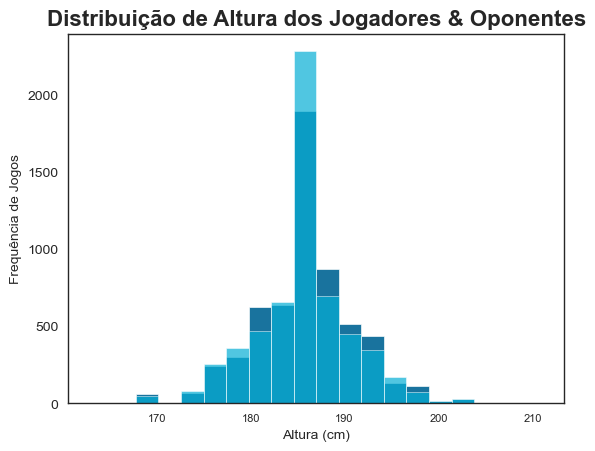

In [42]:
# Crie um histograma para a variável 'Height_Player' e 'Height_Opponent'
plt.hist(atp_suecia['Height_Player'],bins=20, color= '#006494', alpha=0.9)
plt.hist(atp_suecia['Height_Opponent'],bins=20,  color= '#06AED5', alpha=0.7)
plt.xlabel('Altura (cm)', size = 10)
plt.ylabel('Frequência de Jogos', size = 10)
plt.title('Distribuição de Altura dos Jogadores & Oponentes', fontsize=16, fontweight='bold')
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.grid(False)
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.show()

#### Distribuição de `Idades`

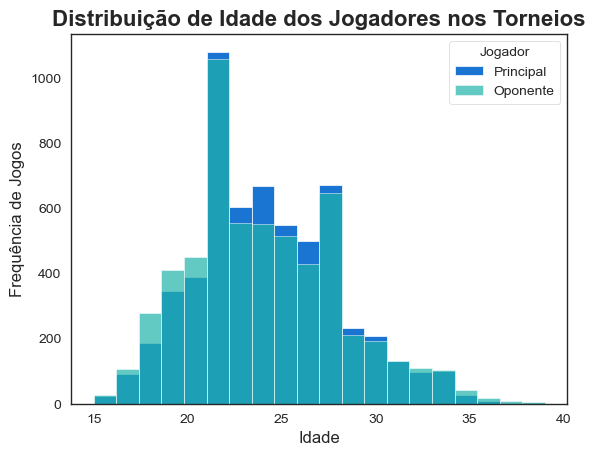

In [43]:
# Representar o Histograma
plt.hist(atp_suecia['Age_Player_Tournament'],bins=20, color= '#1974d2', alpha=1)
plt.hist(atp_suecia['Age_Opponent_Tournament'],bins=20,  color= '#20b2aa', alpha=0.7)

# Definir os rótulos dos eixos x e y
plt.xlabel('Idade')
plt.ylabel('Frequência de Jogos')

# Definir o Título do Gráfico 
plt.title('Distribuição de Idade dos Jogadores nos Torneios', fontsize=16, fontweight='bold')
plt.legend(labels = ['Principal','Oponente'], title='Jogador', loc='best')
plt.show()

#### `Ground`

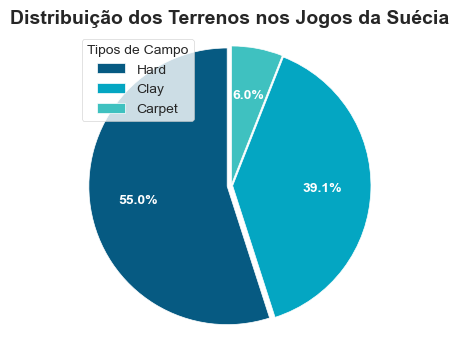

In [44]:
# Criar figura e eixos
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

# Contar a frequência de cada categoria da variável "Ground"
frequencia = atp_suecia['Ground'].value_counts()

# Configurações do gráfico
labels = frequencia.index
valores = frequencia.values
colors = ['#065a82','#04A6C2','#3FC1C0'] # Selecionar tons de azul para cada categoria
explode = (0.03, 0.01, 0.01)

# Criação do gráfico de pizza
plt.pie(valores, colors=colors, autopct='%1.1f%%', 
        startangle=90, pctdistance=0.65, labeldistance=1.1, 
        textprops={'color': 'white', 'weight': 'bold'},
        explode=explode)
plt.axis('equal')

# Configurações adicionais
plt.title('Distribuição dos Terrenos nos Jogos da Suécia', fontsize=14, fontweight='bold')
plt.legend(labels = labels, title='Tipos de Campo', loc='best')

plt.show()

#### Série Temporal com o `Nº de Jogos` e o `Prémio`

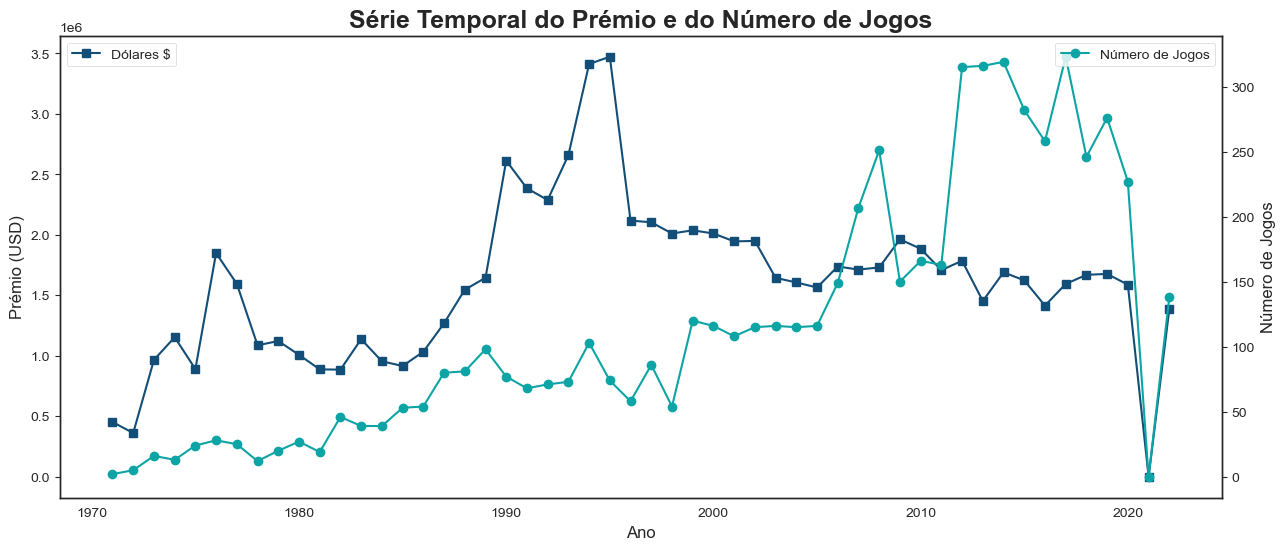

In [45]:
# Agrupar o dataset por 'Tournament_Start_Date', somando a coluna 'Prize' e contando o número de Torneios
time_series = atp_suecia.groupby('Tournament_Start_Date').agg({'Prize': 'first', 'Tournament': 'count'})
time_series = time_series.resample('Y').sum()

# Plotar a série temporal
fig, ax1 = plt.subplots(figsize=(15, 6))

# plotar a série temporal da coluna 'Prize'
ax1.plot(time_series.index, time_series['Prize'],marker='s', color='#124e78')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Prémio (USD)')
ax1.tick_params(axis='y')

# criar um segundo eixo Y para a série temporal da coluna 'GameRound'
ax2 = ax1.twinx()
ax2.plot(time_series.index, time_series['Tournament'],marker='o', color='#0CA4A5')
ax2.set_ylabel('Número de Jogos')
ax2.tick_params(axis='y')

# Definir o título e as legendas
plt.title('Série Temporal do Prémio e do Número de Jogos', fontsize=18, fontweight='bold')
ax1.legend(["Dólares $"],loc="upper left")
ax2.legend(["Número de Jogos"],loc="upper right")
plt.show()

#### Boxplot `Age_Difference` e `Tournament`

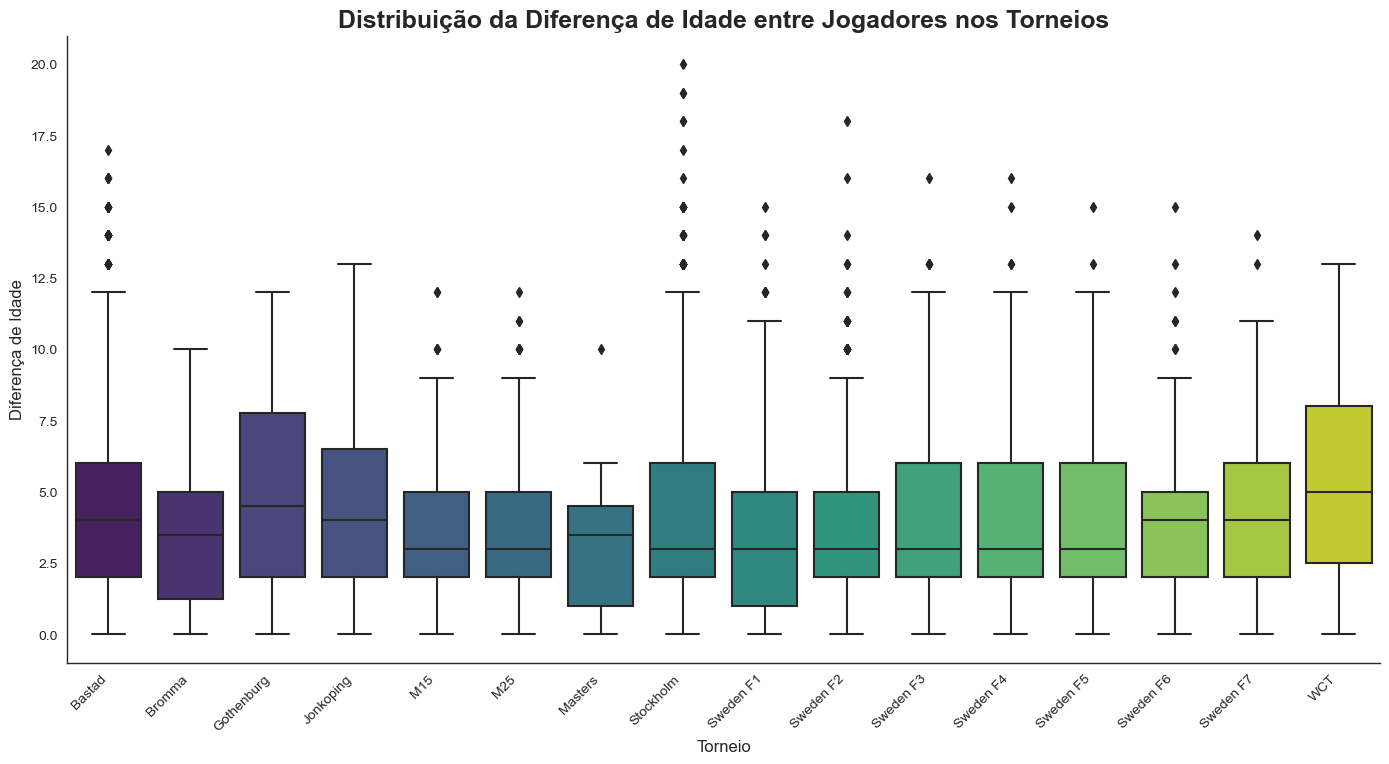

In [46]:
# Ordena o DataFrame pela coluna "Tournament"
atp_suecia_ = atp_suecia.sort_values("Tournament")

# Cria o gráfico de boxplot
ax = sns.catplot(y="Age_Difference", x="Tournament", data=atp_suecia_, palette='viridis', kind="box", height=7, aspect=14/7)

# Define os rótulos dos eixos x e y e o título do gráfico
ax.set_axis_labels("Torneio", "Diferença de Idade")
plt.title("Distribuição da Diferença de Idade entre Jogadores nos Torneios", fontsize=18, fontweight='bold')

# Rotaciona os nomes dos torneios na diagonal
ax.set_xticklabels(rotation=45, horizontalalignment='right')

# Mostra o gráfico
plt.show()

#### Pair Plot

In [47]:
# plt.figure(figsize=(10,8), dpi= 80)
# sns.pairplot(atp_suecia, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
# plt.show();

### 📉 Matriz de Correlação

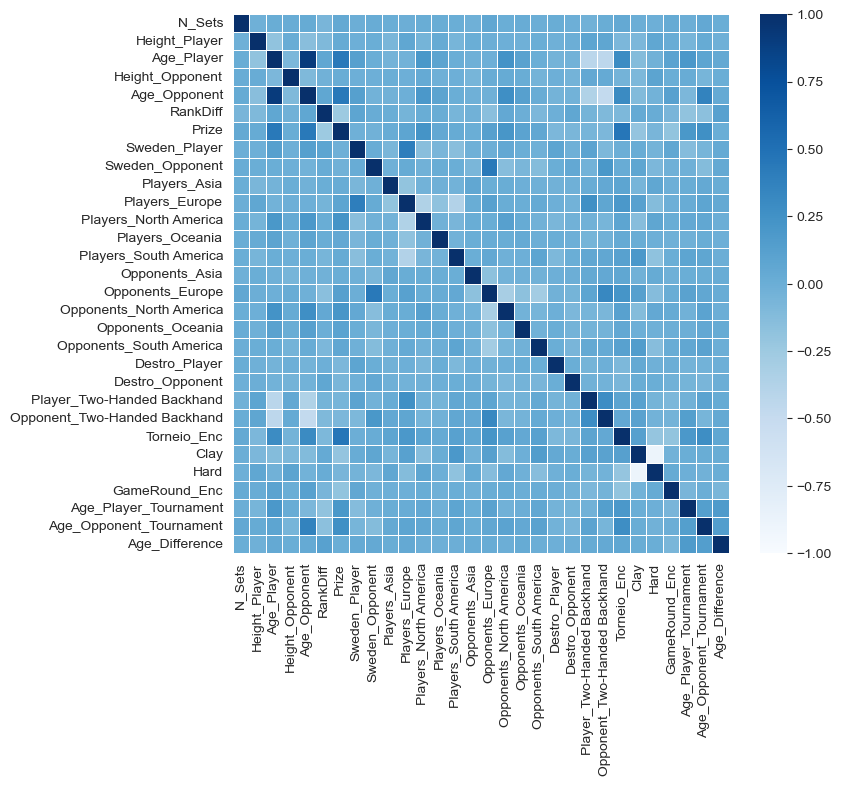

In [48]:
# Selecionar as variáveis numéricas que deseja analisar
num_vars = list(atp_suecia.select_dtypes(['float', 'int','uint8', 'int64']).columns)
num_vars.remove('N_Sets')    # Colocar a variável target na 1º posição
num_vars.insert(0, 'N_Sets')

# Criar um dataframe apenas com essas variáveis
df_num = atp_suecia[num_vars]
df_num.dropna(inplace= True)

# Calcular a Matriz de Correlação
corr_matrix = df_num.corr(method="pearson")

# Representação da Matriz de Correlação
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=False, fmt='.1f', cmap="Blues", 
            cbar=True, linewidths=0.5, ax=ax)
plt.show()

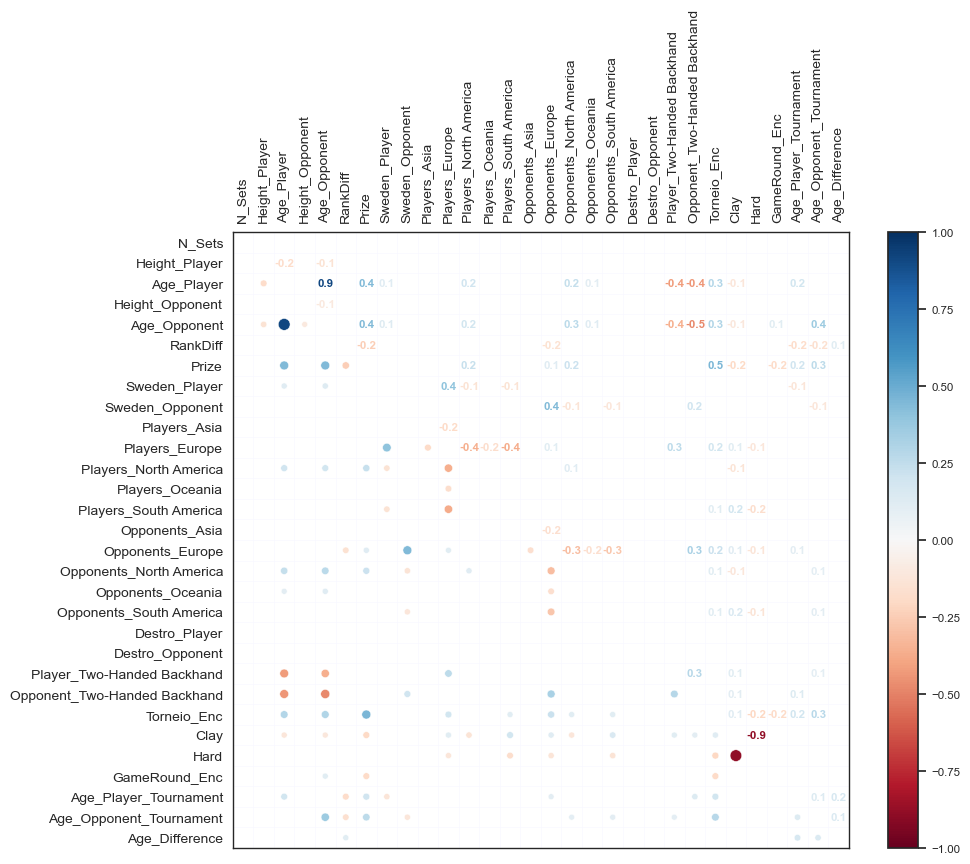

In [49]:
# Fonte: https://stackoverflow.com/questions/73581384/plotting-a-fancy-diagonal-correlation-matrix-in-python-with-coefficients-in-uppe
corr = corr_matrix

# mask and melt correlation matrix
mask = np.tril(np.ones_like(corr, dtype=bool)) | corr.abs().le(0.1)
melt = corr.mask(mask).melt(ignore_index=False).reset_index()
melt["size"] = melt["value"].abs()

fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style="white")

# normalize colorbar
cmap = plt.cm.RdBu
norm = plt.Normalize(-1, 1)
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = plt.colorbar(sm, ax=ax)
cbar.ax.tick_params(labelsize="x-small")

# plot lower triangle (scatter plot with normalized hue and square markers)
sns.scatterplot(ax=ax, data=melt, x="index", y="variable", size="size",
                hue="value", hue_norm=norm, palette=cmap,linewidths=.5,
                style=0, markers=["o"], legend=False)

# format grid
xmin, xmax = (-0.5, corr.shape[0] - 0.5)
ymin, ymax = (-0.5, corr.shape[1] - 0.5)
ax.vlines(np.arange(xmin, xmax + 1), ymin, ymax, lw=0.5, color="#f8f8ff")
ax.hlines(np.arange(ymin, ymax + 1), xmin, xmax, lw=0.5, color="#f8f8ff")
ax.set(aspect=1, xlim=(xmin, xmax), ylim=(ymax, ymin), xlabel="", ylabel="")
ax.tick_params(labelbottom=False, labeltop=True)
plt.xticks(rotation=90)

# annotate upper triangle
for y in range(corr.shape[0]):
    for x in range(corr.shape[1]):
        value = corr.mask(mask).to_numpy()[y, x]
        if pd.notna(value):
            plt.text(x, y, f"{value:.1f}", size="x-small",
                     color=sm.to_rgba(value), weight="bold",
                     ha="center", va="center")

---

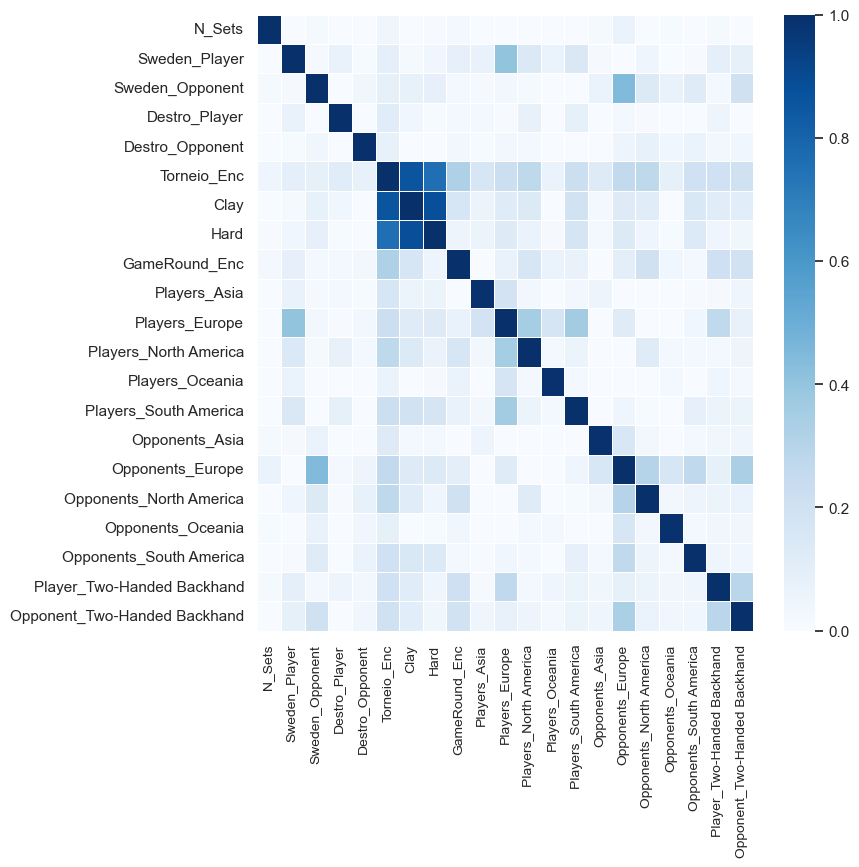

In [50]:
from scipy.stats import chi2_contingency
from collections import defaultdict

# Função para calcular a matriz de Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Selecionar as variáveis categóricas que deseja analisar
cat_vars = ['N_Sets','Sweden_Player', 'Sweden_Opponent', 'Destro_Player', 'Destro_Opponent',
            'Torneio_Enc', 'Clay', 'Hard', 'GameRound_Enc', 'Players_Asia', 'Players_Europe', 'Players_North America', 'Players_Oceania',
            'Players_South America', 'Opponents_Asia', 'Opponents_Europe', 'Opponents_North America', 'Opponents_Oceania', 'Opponents_South America',
            'Player_Two-Handed Backhand', 'Opponent_Two-Handed Backhand']

# Criar um dataframe apenas com essas variáveis
df_cat = atp_suecia[cat_vars]
df_cat.dropna(inplace=True)

# Calcular a matriz de correlação Cramer's V
corr_matrix = pd.DataFrame(np.zeros((len(cat_vars), len(cat_vars))), columns=cat_vars, index=cat_vars)

for i, var1 in enumerate(cat_vars):
    for j, var2 in enumerate(cat_vars):
        if i <= j:
            corr = cramers_v(df_cat[var1], df_cat[var2])
            corr_matrix.loc[var1, var2] = corr
            corr_matrix.loc[var2, var1] = corr

# Representação da matriz de correlação Cramer's V
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, vmin=0., vmax=1., annot=False, fmt='.2f', cmap="Blues", 
            cbar=True, linewidths=0.5, ax=ax)

plt.rcParams.update({'font.size': 10})
plt.xticks(fontsize=10)
plt.show()

In [51]:
# Criar um dicionário com as correlações de cada variável com 'N_Sets'
corr_dict = {var: round(cramers_v(df_cat[var], df_cat['N_Sets']),2) for var in cat_vars}

# Criar o DataFrame com as correlações em ordem decrescente
corr_df = pd.DataFrame({'V de Cramer com N_Sets': corr_dict}).sort_values('V de Cramer com N_Sets', ascending=False)
corr_df

,V de Cramer com N_Sets
N_Sets,1.00
Opponents_Europe,0.06
Torneio_Enc,0.04
GameRound_Enc,0.03
Opponents_Asia,0.02
Sweden_Opponent,0.02
Player_Two-Handed Backhand,0.02
Opponents_Oceania,0.01
Opponent_Two-Handed Backhand,0.00
Opponents_North America,0.00


In [52]:
# Função para calcular o ETA e ETA^2 - https://stackoverflow.com/questions/52083501/how-to-compute-correlation-ratio-or-eta-in-python
def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)
    ssw = 0
    ssb = 0
    for category in set(categories):
        subgroup = values[np.where(categories == category)[0]]
        ssw += sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(values))**2
    return (ssb / (ssb + ssw))**.5

In [53]:
# Lista para armazenar os resultados do ETA
eta_results = []

# Selecionar as variáveis numéricas que deseja analisar
num_vars = list(atp_suecia.select_dtypes(['float64', 'int', 'int64']).columns)
num_vars.remove('N_Sets')

atp_suecia_eta = atp_suecia.copy().dropna()

# Ciclo for
for column in num_vars:
    # Calcula o ETA e o ETA^2 e adiciona à lista
    eta = correlation_ratio(atp_suecia_eta['N_Sets'], atp_suecia_eta[column])
    eta_sq = eta**2
    eta_results.append((column, round(eta,4), round(eta_sq,4)))
        
# Cria um dataframe com os resultados
eta_df = pd.DataFrame(eta_results, columns=['Variável', 'ETA', 'ETA^2'])
eta_df = eta_df.set_index('Variável')

# Ordena os resultados pelo ETA^2 em ordem decrescente
eta_df = eta_df.sort_values('ETA^2', ascending=False)
eta_df

,ETA,ETA^2
Variável,,
Age_Opponent_Tournament,0.0566,0.0032
Age_Opponent,0.0512,0.0026
RankDiff,0.0469,0.0022
Prize,0.0417,0.0017
Height_Player,0.0381,0.0015
Age_Player_Tournament,0.0271,0.0007
Torneio_Enc,0.0231,0.0005
Age_Difference,0.0226,0.0005
GameRound_Enc,0.0207,0.0004


In [54]:
# Guardar os dados para o Dashboard
atp_suecia.to_csv('df_atp_PowerBI.csv', index= False)

In [55]:
# Informação sobre os dados
atp_suecia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5937 entries, 0 to 5993
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   PlayerName                    5937 non-null   object        
 1   Link_Player                   5937 non-null   object        
 2   Born_Player                   4922 non-null   object        
 3   Height_Player                 5937 non-null   float64       
 4   Hand_Player                   5394 non-null   object        
 5   Birthdate_Player              5914 non-null   datetime64[ns]
 6   Age_Player                    5930 non-null   float64       
 7   Opponent                      5937 non-null   object        
 8   Link_Opponent                 5937 non-null   object        
 9   Born_Opponent                 4456 non-null   object        
 10  Height_Opponent               5937 non-null   float64       
 11  Hand_Opponent                 

# <a class='anchor' id='3'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#67C7ED, #0371B1,#0A6394); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 34px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>3 | Modeling</b></h1></center>
</div>

### ⚖️ Divisão em Conjunto Treino/Teste

In [57]:
# Retirar colunas desnecessárias e NaNs
atp_suecia = atp_suecia.drop(['PlayerName', 'Link_Player', 'Born_Player','Birthdate_Player','Hand_Player',
                              'Opponent','Link_Opponent', 'Born_Opponent', 'Birthdate_Opponent','Hand_Opponent',
                              'Ground','GameRound', 'Backhand_Player', 'Backhand_Opponent', 'Continentes_Opponents', 'Continentes_Players',
                              'Player_Two-Handed Backhand','Opponent_Two-Handed Backhand','Tournament'], axis=1)

print('Nº de Valores Omissos Geral:', atp_suecia.isna().any(axis=1).sum(), '(', round(atp_suecia.isna().any(axis=1).sum()/len(atp_suecia) * 100, 2),'% do dataset total)')

print('Nº de Observações com NAs eliminadas:', len(atp_suecia.index) - len(atp_suecia.dropna().index), '(',round(((len(atp_suecia.index) - len(atp_suecia.dropna().index)) / len(atp_suecia.index)) * 100,2), '%)')
atp_suecia = atp_suecia.dropna()

Nº de Valores Omissos Geral: 107 ( 1.8 % do dataset total)
Nº de Observações com NAs eliminadas: 107 ( 1.8 %)


In [59]:
# Dividir o dataset em treino e teste, balanceando de acordo com a distribuição da variável target 'N_Sets'
dtf_train, dtf_test = model_selection.train_test_split(atp_suecia, 
                                                       test_size=0.1, 
                                                       stratify=atp_suecia["N_Sets"], 
                                                       random_state=123)

# Tamanho dos dataset de Treino e Teste
print("Treino:", dtf_train.shape)
print("Teste:", dtf_test.shape)

Treino: (5247, 30)
Teste: (583, 30)


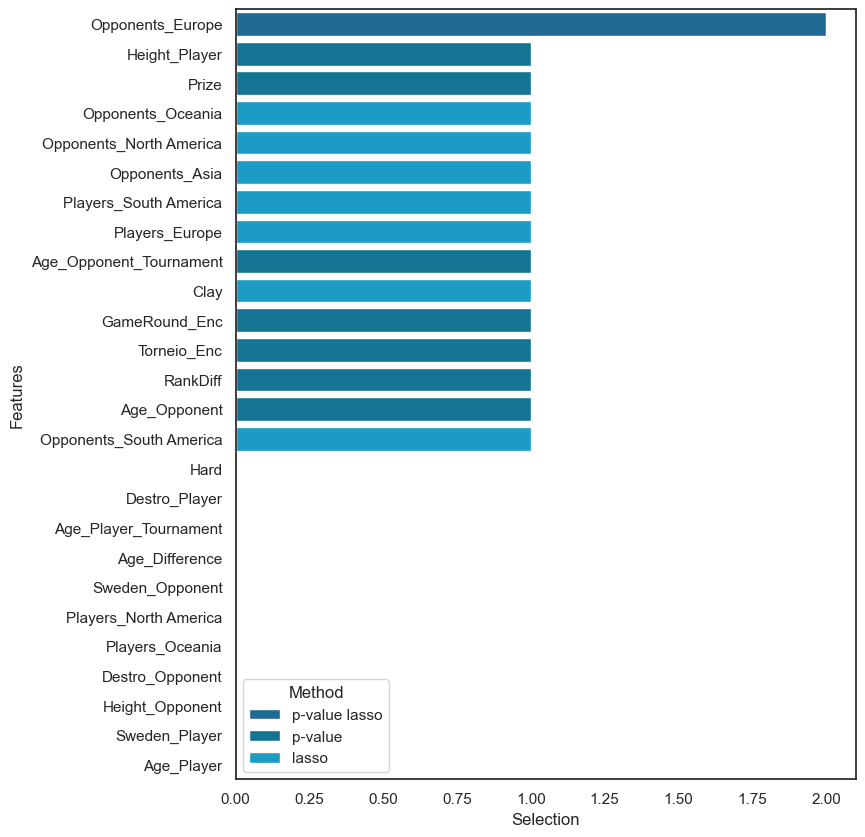

In [60]:
## Advanced feature selection
##      1. using linear regression - compare simple logistic regressions and compare p-value (or Anova)
##      2. using Ridge regularization

X_names = ['Height_Player','Destro_Player', 'Age_Player','Sweden_Player',
            'Height_Opponent', 'Destro_Opponent','Age_Opponent','Sweden_Opponent', 'RankDiff',
            'Torneio_Enc','Prize','Clay', 'Hard','GameRound_Enc',
            'Age_Player_Tournament', 'Age_Opponent_Tournament', 'Age_Difference',
            'Players_Europe', 'Players_North America', 'Players_Oceania','Players_South America',
            'Opponents_Asia', 'Opponents_Europe','Opponents_North America', 'Opponents_Oceania','Opponents_South America']

X = dtf_train[X_names].values
y = dtf_train["N_Sets"].values
feature_names = dtf_train[X_names].columns

## Anova
selector = feature_selection.SelectKBest(score_func=feature_selection.f_classif, k=8).fit(X,y)
anova_selected_features = feature_names[selector.get_support()]

## Lasso regularization
selector = feature_selection.SelectFromModel(estimator= linear_model.LogisticRegression(C=1, penalty="l1",solver='liblinear'),max_features=8).fit(X,y)
lasso_selected_features = feature_names[selector.get_support()]
 
## Plot
dtf_features = pd.DataFrame({"Features":feature_names})
dtf_features["anova"] = dtf_features["Features"].apply(lambda x: "p-value" if x in anova_selected_features else "")
dtf_features["num1"] = dtf_features["Features"].apply(lambda x: 1 if x in anova_selected_features else 0)
dtf_features["lasso"] = dtf_features["Features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
dtf_features["num2"] = dtf_features["Features"].apply(lambda x: 1 if x in lasso_selected_features else 0)
dtf_features["Method"] = dtf_features[["anova","lasso"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["Selection"] = dtf_features["num1"] + dtf_features["num2"]

plt.figure(figsize=(8, 10))  # define as dimensões da figura
sns.barplot(y="Features", x="Selection", hue="Method",
            data=dtf_features.sort_values("Selection", ascending=False), 
            dodge=False, palette=['#0B6FA9','#007FA8','#00AAE0']);

In [61]:
# Lista das Variáveis selecionadas pela 'Anova'
anova_selected_features

Index(['Height_Player', 'Age_Opponent', 'RankDiff', 'Torneio_Enc', 'Prize',
       'GameRound_Enc', 'Age_Opponent_Tournament', 'Opponents_Europe'],
      dtype='object')

In [62]:
# Lista das Variáveis selecionadas pela 'Lasso'
lasso_selected_features

Index(['Clay', 'Players_Europe', 'Players_South America', 'Opponents_Asia',
       'Opponents_Europe', 'Opponents_North America', 'Opponents_Oceania',
       'Opponents_South America'],
      dtype='object')

### 🧩 Escolha das Variáveis para os Modelos

In [63]:
# Lista das variáveis selecionadas para os modelos
X_names1 = ['Height_Player','Destro_Player', 'Player_Two-Handed Backhand', 'Age_Player','Sweden_Player',
            'Height_Opponent', 'Destro_Opponent', 'Opponent_Two-Handed Backhand','Age_Opponent','Sweden_Opponent',
            'Torneio_Enc','Prize','Clay', 'Hard','GameRound_Enc','Age_Player_Tournament', 'Age_Opponent_Tournament']
# As variáveis selecionadas em 'X_names1' produziram os resultados dos modelos apresentados na Semana 4 - 10/05/2023

In [64]:
X_names2 = ['Height_Player', 'Height_Opponent', 'Torneio_Enc', 'Prize', 'Age_Opponent_Tournament',
            'Opponents_Asia','Opponents_Europe', 'Destro_Player', 'Destro_Opponent', 'Hard', 'Players_Oceania',
            'Opponents_North America', 'Opponents_Oceania', 'Opponents_South America']
# As variáveis selecionadas em 'X_names2' produziram os resultados dos modelos apresentados na Semana 5 - 17/05/2023

In [65]:
X_names3 = ['Height_Player','Destro_Player', 'Age_Player','Sweden_Player',
            'Height_Opponent', 'Destro_Opponent','Age_Opponent','Sweden_Opponent','RankDiff',
            'Torneio_Enc','Prize','Clay', 'Hard','GameRound_Enc',
            'Age_Player_Tournament', 'Age_Opponent_Tournament', 'Age_Difference',
            'Players_Europe', 'Players_North America', 'Players_Oceania','Players_South America', 'Players_Asia',
            'Opponents_Asia', 'Opponents_Europe','Opponents_North America', 'Opponents_Oceania','Opponents_South America']
# As variáveis selecionadas em 'X_names3' produziram os resultados dos modelos apresentados na Semana 6 - 24/05/2023

In [66]:
# Lista das variáveis escolhidas no 'Advanced Feature Selection'
X_names_selected = list(anova_selected_features)
for feature in lasso_selected_features:
    if feature not in X_names_selected:
        X_names_selected.append(feature)
X_names_selected

['Height_Player',
 'Age_Opponent',
 'RankDiff',
 'Torneio_Enc',
 'Prize',
 'GameRound_Enc',
 'Age_Opponent_Tournament',
 'Opponents_Europe',
 'Clay',
 'Players_Europe',
 'Players_South America',
 'Opponents_Asia',
 'Opponents_North America',
 'Opponents_Oceania',
 'Opponents_South America']

In [67]:
# Conjuto Treino/Teste
X_train = dtf_train[X_names3].values
y_train = dtf_train["N_Sets"].values

X_test = dtf_test[X_names3].values
y_test = dtf_test["N_Sets"].values

## 💡 Modelos

In [68]:
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import adjusted_rand_score, roc_auc_score, SCORERS

---

In [69]:
# Para os modelos do KNN e da Regressão Logistica, vamos normalizar as variáveis
from sklearn.preprocessing import MinMaxScaler

X_train_norm = MinMaxScaler().fit_transform(X_train)
X_test_norm = MinMaxScaler().fit_transform(X_test)

### KNN

In [70]:
# KNN | K-Nearest Neighbors
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_norm,y_train,cv=5)
print(cv)
print(cv.mean())

[0.62380952 0.62380952 0.62535748 0.64156339 0.63107722]
0.6291234282082709


In [71]:
# Treinar o modelo
knn.fit(X_train_norm, y_train)

# Testar o modelo
predicted_prob = knn.predict_proba(X_test_norm)[:,1]
predicted = knn.predict(X_test_norm)
y_proba = knn.predict_proba(X_test_norm)

# Accuracy
accuracy = metrics.accuracy_score(y_test, predicted)
print("Accuracy (overall correct predictions):",  round(accuracy,2))

# AUC
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("AUC:", round(auc,2))

# Precision, Recall e F1-Score
recall = metrics.recall_score(y_test, predicted, average='weighted')
precision = metrics.precision_score(y_test, predicted, average='weighted')
f1_score = metrics.f1_score(y_test, predicted, average='weighted')
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("F1-Score:", round(f1_score,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.63
AUC: 0.56
Recall (all 1s predicted right): 0.63
Precision (confidence when predicting a 1): 0.6
F1-Score: 0.61
Detail:
              precision    recall  f1-score   support

           2       0.70      0.79      0.74       399
           3       0.37      0.27      0.31       184

    accuracy                           0.63       583
   macro avg       0.54      0.53      0.53       583
weighted avg       0.60      0.63      0.61       583



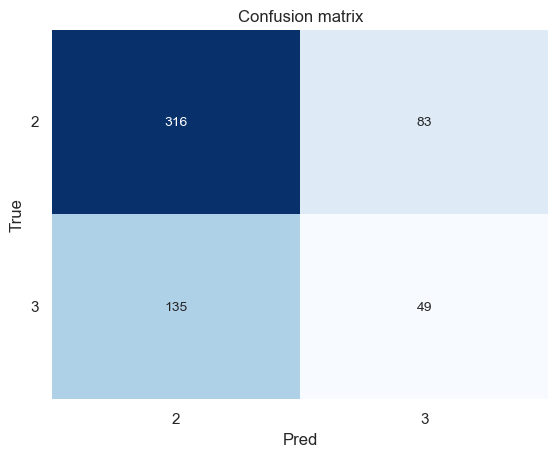

In [72]:
# Confusion Matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, xticklabels=[2,3])
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=[2,3], rotation=0)
plt.show()

In [73]:
# ROC AUC Score Average   |  "Macro" average = unweighted mean   ========== Quando queremos ver o AUC de várias classes
# print(round(roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovr', average = 'macro'),4))

---

### Regressão Logística

In [74]:
# Logistic Regression
lr = LogisticRegression(max_iter = 200000)
cv = cross_val_score(lr,X_train_norm,y_train,cv=5) # cv=5 -> Validação Cruzada com 5 folds
print(cv)
print(cv.mean())

[0.68380952 0.68285714 0.6835081  0.6835081  0.68446139]
0.6836288528757546


In [75]:
# Treinar o modelo
lr.fit(X_train_norm, y_train)

# Testar o modelo
predicted_prob = lr.predict_proba(X_test_norm)[:,1]
predicted = lr.predict(X_test_norm)
y_proba = lr.predict_proba(X_test_norm)

# Accuracy
accuracy = metrics.accuracy_score(y_test, predicted)
print("Accuracy (overall correct predictions):",  round(accuracy,2))

# AUC
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("AUC:", round(auc,2))

# Precision, Recall e F1-Score
recall = metrics.recall_score(y_test, predicted, average='weighted')
precision = metrics.precision_score(y_test, predicted, average='weighted')
f1_score = metrics.f1_score(y_test, predicted, average='weighted')
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("F1-Score:", round(f1_score,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.68
AUC: 0.56
Recall (all 1s predicted right): 0.68
Precision (confidence when predicting a 1): 0.47
F1-Score: 0.56
Detail:
              precision    recall  f1-score   support

           2       0.68      1.00      0.81       399
           3       0.00      0.00      0.00       184

    accuracy                           0.68       583
   macro avg       0.34      0.50      0.41       583
weighted avg       0.47      0.68      0.56       583



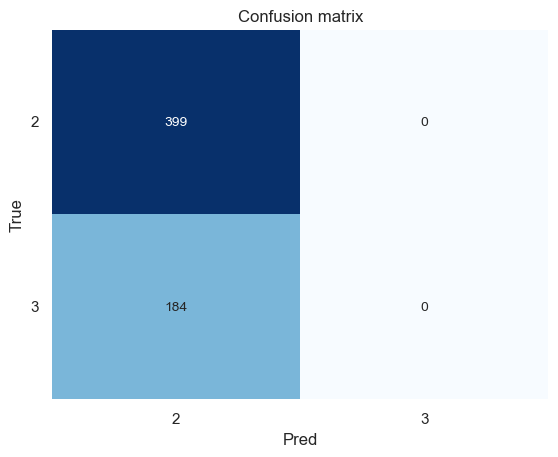

In [76]:
# Confusion Matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, xticklabels=[2,3])
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=[2,3], rotation=0)
plt.show()

In [77]:
# ROC AUC Score Average   |  "Macro" average = unweighted mean      ========== Quando queremos ver o AUC de várias classes
# round(roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovr', average = 'macro'),4)

---

### Árvore de Decisão

In [78]:
# Decision Tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.57238095 0.58190476 0.55481411 0.58436606 0.58341277]
0.57537573198965


In [79]:
# Treinar o modelo
dt.fit(X_train, y_train)

# Testar o modelo
predicted_prob = dt.predict_proba(X_test)[:,1]
predicted = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)

# Accuracy
accuracy = metrics.accuracy_score(y_test, predicted)
print("Accuracy (overall correct predictions):",  round(accuracy,2))

# AUC
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("AUC:", round(auc,2))

# Precision, Recall e F1-Score
recall = metrics.recall_score(y_test, predicted, average='weighted')
precision = metrics.precision_score(y_test, predicted, average='weighted')
f1_score = metrics.f1_score(y_test, predicted, average='weighted')
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("F1-Score:", round(f1_score,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.61
AUC: 0.55
Recall (all 1s predicted right): 0.61
Precision (confidence when predicting a 1): 0.61
F1-Score: 0.61
Detail:
              precision    recall  f1-score   support

           2       0.71      0.72      0.72       399
           3       0.38      0.37      0.37       184

    accuracy                           0.61       583
   macro avg       0.55      0.55      0.55       583
weighted avg       0.61      0.61      0.61       583



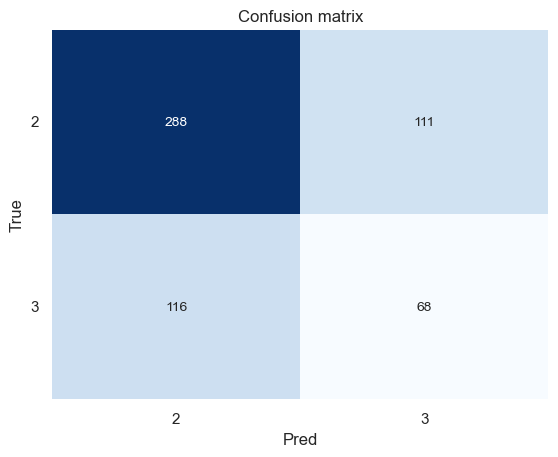

In [80]:
# Confusion Matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, xticklabels=[2,3])
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=[2,3], rotation=0)
plt.show()

In [81]:
# ROC AUC Score Average   |  "Macro" average = unweighted mean   ========== Quando queremos ver o AUC de várias classes
# print(round(roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovr', average = 'macro'),4))

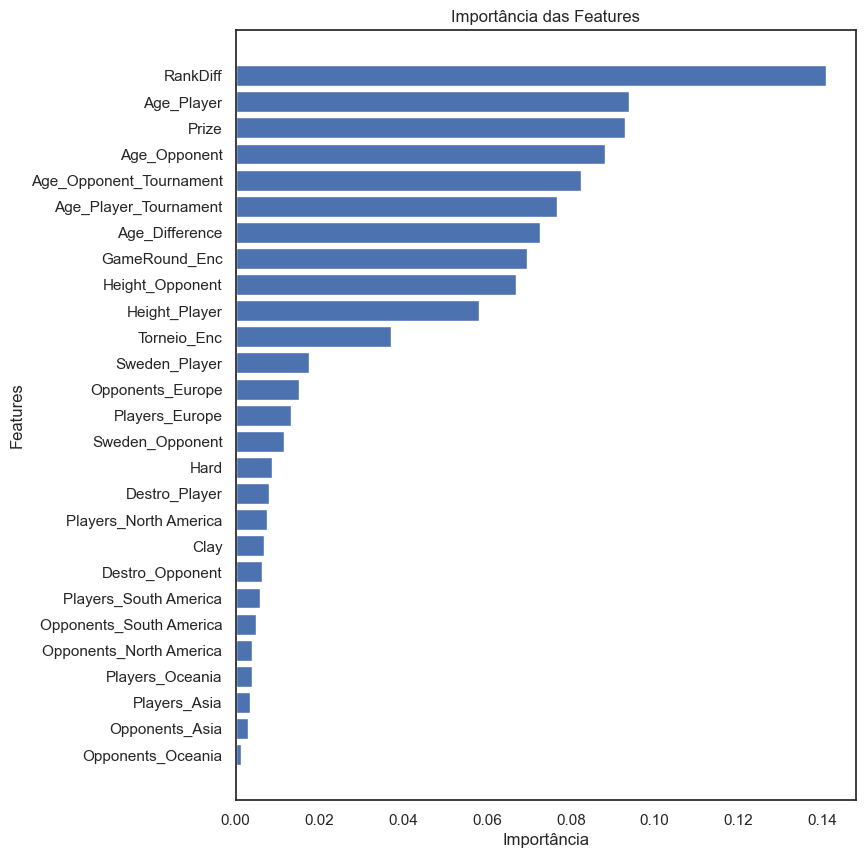

In [82]:
# Importância das features/variáveis

# Ordenar as barras em ordem descendente
sorted_indices = sorted(range(len(dt.feature_importances_)), key=lambda k: dt.feature_importances_[k], reverse=False)
sorted_feature_importances = [dt.feature_importances_[i] for i in sorted_indices]
sorted_X_names = [X_names3[i] for i in sorted_indices]

plt.figure(figsize=(8, 10)) 
plt.barh(sorted_X_names, sorted_feature_importances)
plt.title('Importância das Features')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.show()

In [83]:
# Nível máximo da árvore (profundidade)
dt.get_depth()

33

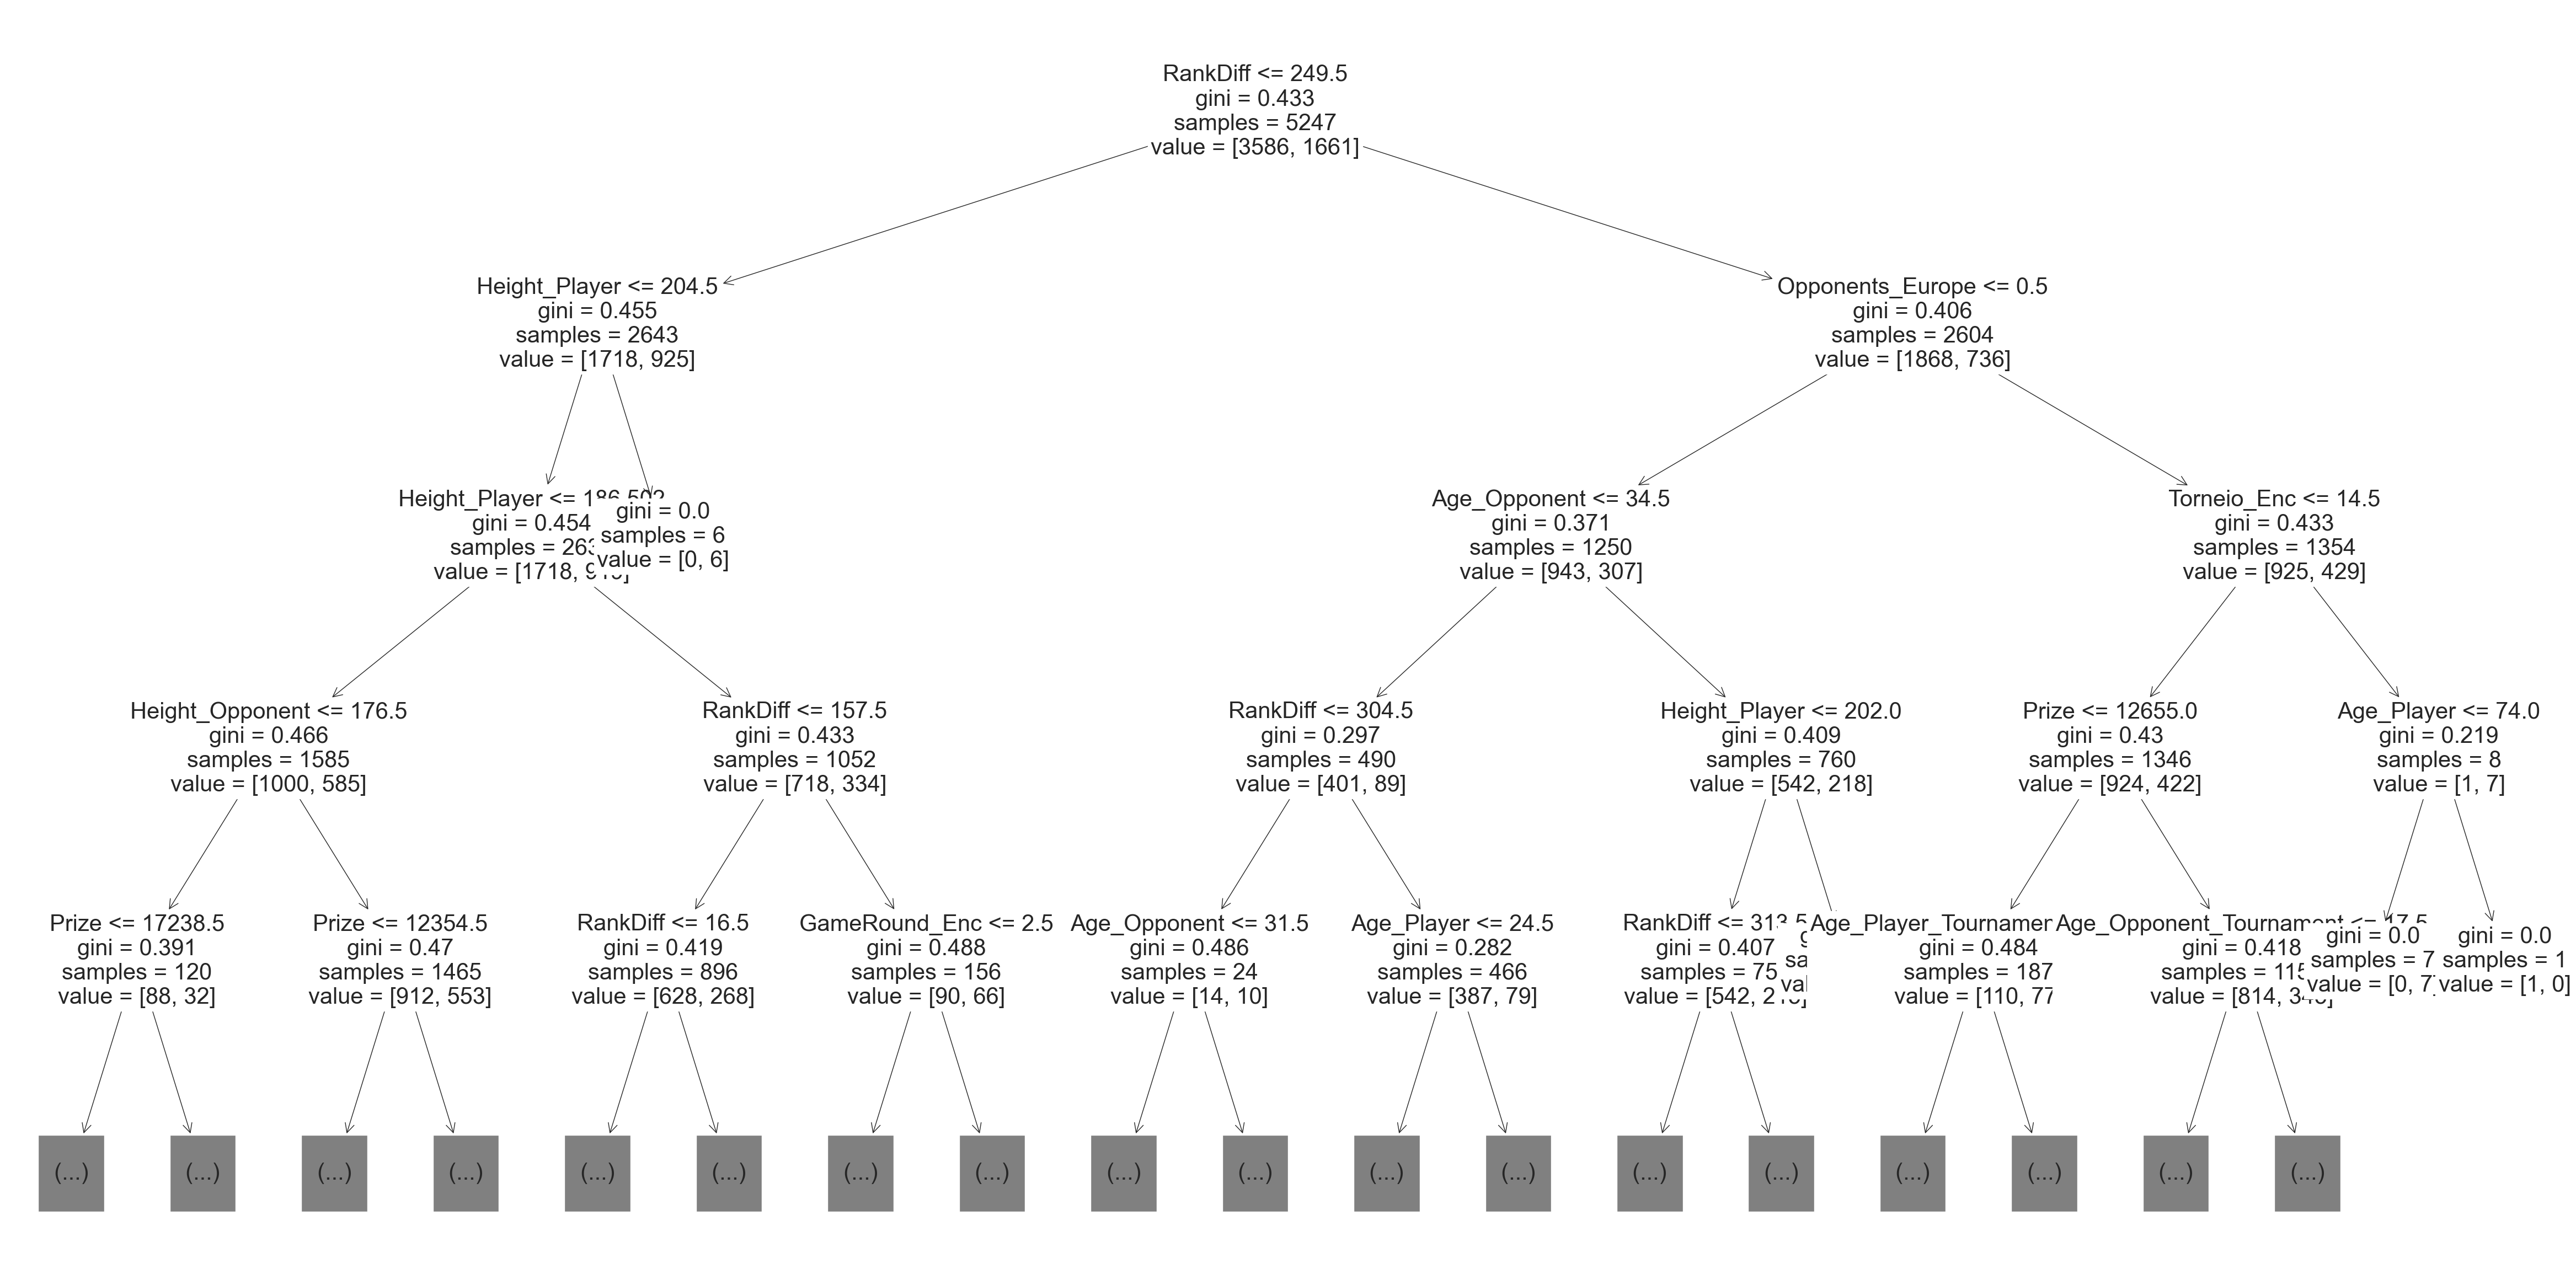

In [84]:
from sklearn import tree

# Representação Gráfica de 5 níveis de profundiade da Árvore de Decisão
fig = plt.figure(figsize=(60,30))
tree.plot_tree(dt, feature_names=dtf_train[X_names3].columns, fontsize=30, max_depth=4);

### Multicolinearidade

In [85]:
from sklearn.feature_selection import VarianceThreshold

# Verificamos se temos Multicolinearidade
print('Nº de Colunas antes da seleção:', len(dtf_train[X_names3].columns))
selector = VarianceThreshold(threshold=0.01)
X_new = selector.fit_transform(X_train)


print('Nº de Colunas após da seleção:', len(dtf_train[X_names3].columns[selector.get_support()]))

Nº de Colunas antes da seleção: 27
Nº de Colunas após da seleção: 27


In [86]:
from collections import Counter

### Define function for outlier detection, based on IQR method
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers 

In [87]:
dtf_train.loc[detect_outliers(dtf_train,['N_Sets', 'Prize', 'Height_Player', 'Height_Opponent'])]

,Height_Player,Age_Player,Height_Opponent,Age_Opponent,RankDiff,Tournament_Start_Date,Tournament_End_Date,Prize,N_Sets,Sweden_Player,...,Opponents_South America,Destro_Player,Destro_Opponent,Torneio_Enc,Clay,Hard,GameRound_Enc,Age_Player_Tournament,Age_Opponent_Tournament,Age_Difference


> Não existem ***outliers*** tal como já era esperado.

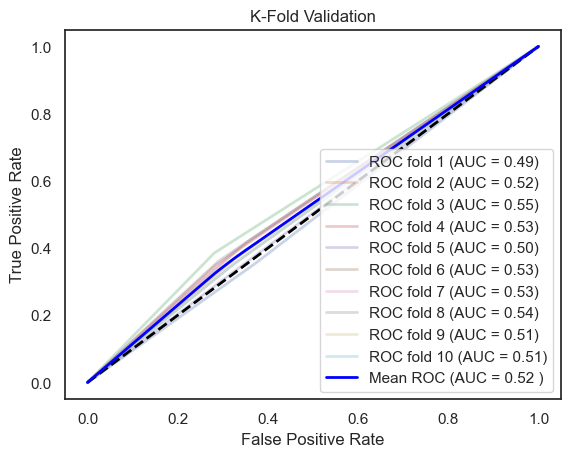

In [88]:
#### StratifiedKFold -> Quando as classes não é equilibrada (garante que os folds têm 0 e 1)
model = tree.DecisionTreeClassifier(random_state = 1)

cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    fpr, tpr, t = metrics.roc_curve(y_train[test], prediction[:, 1], pos_label=3)
    tprs.append(scipy.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1


##### plot a ROC curve for every fold (true positive rate vs false positive rate) 
## illustrates how the ability of a binary classifier changes as its discrimination threshold is varied
## AUC - area under the ROC curve - probability that the classifier will rank 
## a randomly chosen positive observation (Y=1) higher than a randomly chosen negative one (Y=0). 

plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation')
plt.legend(loc="lower right")
plt.show()

---

### Random Forest

In [89]:
# Random Forest
rf = RandomForestClassifier(n_estimators = 50, criterion = 'gini')
rf.fit(X_train, y_train)

cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.67047619 0.65047619 0.64728313 0.66444233 0.66825548]
0.6601866630350901


In [90]:
# Treinar o modelo
rf.fit(X_train, y_train)

# Testar o modelo
predicted_prob = rf.predict_proba(X_test)[:,1]
predicted = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

# Accuracy
accuracy = metrics.accuracy_score(y_test, predicted)
print("Accuracy (overall correct predictions):",  round(accuracy,2))

# AUC
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Auc:", round(auc,2))

# Precision, Recall e F1-Score
recall = metrics.recall_score(y_test, predicted, average='weighted')
precision = metrics.precision_score(y_test, predicted, average='weighted')
f1_score = metrics.f1_score(y_test, predicted, average='weighted')
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("F1-Score:", round(f1_score,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.66
Auc: 0.54
Recall (all 1s predicted right): 0.66
Precision (confidence when predicting a 1): 0.59
F1-Score: 0.59
Detail:
              precision    recall  f1-score   support

           2       0.69      0.92      0.79       399
           3       0.36      0.09      0.15       184

    accuracy                           0.66       583
   macro avg       0.53      0.51      0.47       583
weighted avg       0.59      0.66      0.59       583



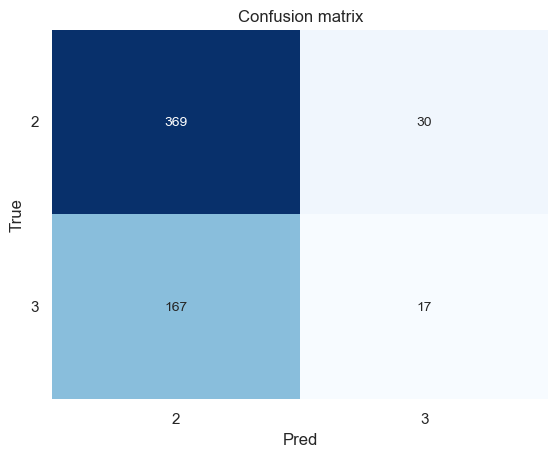

In [91]:
# Confusion Matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, xticklabels=[2,3])
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=[2,3], rotation=0)
plt.show()

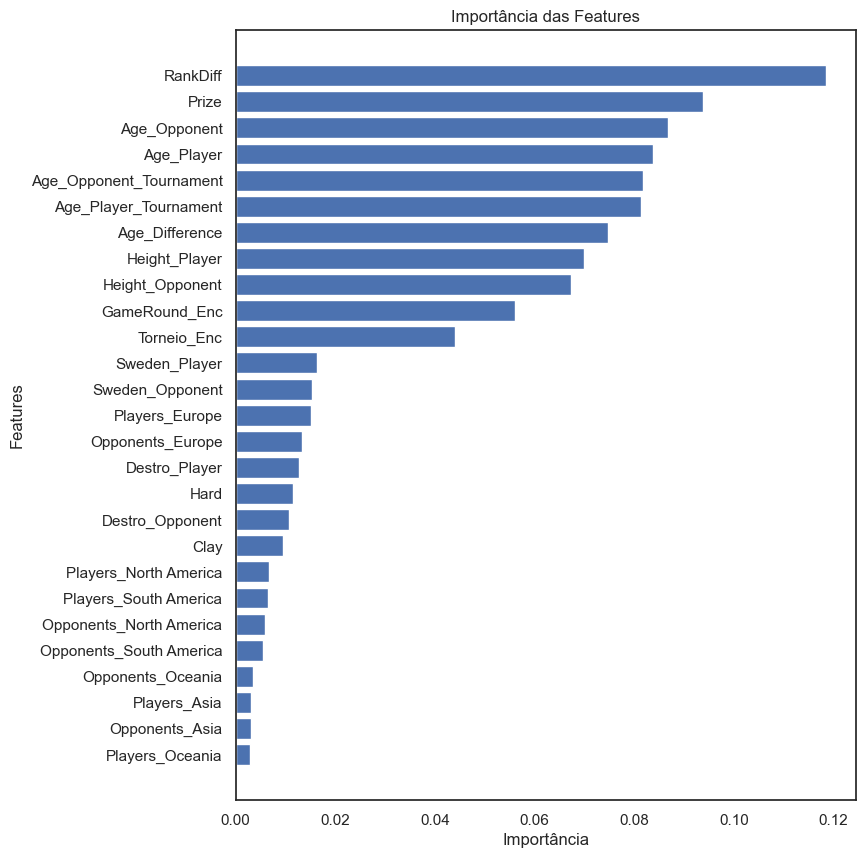

In [92]:
# Importância das features/variáveis

# Ordenar as barras em ordem descendente
sorted_indices = sorted(range(len(rf.feature_importances_)), key=lambda k: rf.feature_importances_[k], reverse=False)
sorted_feature_importances = [rf.feature_importances_[i] for i in sorted_indices]
sorted_X_names = [X_names3[i] for i in sorted_indices]

plt.figure(figsize=(8, 10)) 
plt.barh(sorted_X_names, sorted_feature_importances)
plt.title('Importância das Features')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.show()

In [93]:
# ROC AUC Score Average   |  "Macro" average = unweighted mean     ========== Quando queremos ver o AUC de várias classes
# print(round(roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovr', average = 'macro'),4))

---

## 🛠️ Tunning do Modelo

In [94]:
# Lista de Parâmetros do ExtraTreesClassifier
model = ensemble.ExtraTreesClassifier()
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [95]:
# Definir as combinações de hiperparâmetros a testar
param_dic = {
    'n_estimators': [300,400,500,600,700,800,900, 1000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}


# ExtraTreesClassifier 
model = ensemble.ExtraTreesClassifier()
random_search = model_selection.RandomizedSearchCV(model, 
                                                   param_distributions=param_dic,
                                                   n_iter=20,
                                                   scoring='roc_auc').fit(X_train, y_train)

print("Best Model parameters:", random_search.best_params_)
print("Best Model mean AUC:", random_search.best_score_)

model_best = random_search.best_estimator_

Best Model parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best Model mean AUC: 0.5464443051123347


In [96]:
# Treinar o modelo com o conjunto de treino
model_best.fit(X_train, y_train)

# Testar o modelo com o conjunto de teste
predicted_prob = model_best.predict_proba(X_test)[:,1]
predicted = model_best.predict(X_test)

# Calcular as métricas de desempenho
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
recall = metrics.recall_score(y_test, predicted, average='weighted')
precision = metrics.precision_score(y_test, predicted, average='weighted')
f1_score = metrics.f1_score(y_test, predicted, average='weighted')

# Imprimir as métricas de desempenho
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("F1-Score:", round(f1_score,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.68
Auc: 0.59
Recall (all 1s predicted right): 0.68
Precision (confidence when predicting a 1): 0.56
F1-Score: 0.56
Detail:
              precision    recall  f1-score   support

           2       0.68      0.98      0.81       399
           3       0.30      0.02      0.03       184

    accuracy                           0.68       583
   macro avg       0.49      0.50      0.42       583
weighted avg       0.56      0.68      0.56       583



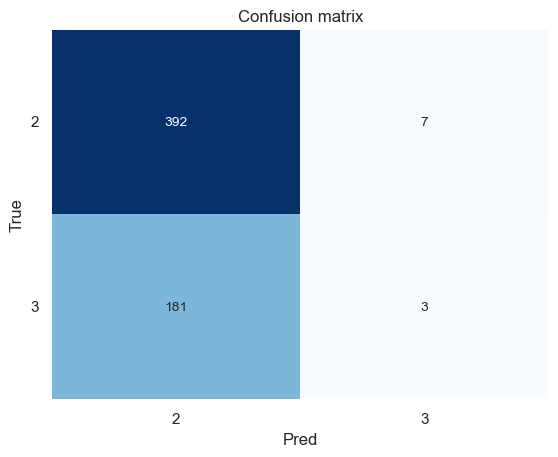

In [97]:
# Confusion Matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, xticklabels=[2,3])
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=[2,3], rotation=0)
plt.show()

---

In [98]:
# Lista de Parâmetros do RandomForestClassifier
model = ensemble.RandomForestClassifier()
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [99]:
# Definir as combinações de hiperparâmetros a testar
param_dic = {
    'n_estimators': [300,400,500,600,700,800,900, 1000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# RandomForestClassifier 
model = ensemble.RandomForestClassifier()
random_search = model_selection.RandomizedSearchCV(model, 
                                                   param_distributions=param_dic,
                                                   n_iter=20,
                                                   scoring='roc_auc').fit(X_train, y_train)

print("Best Model parameters:", random_search.best_params_)
print("Best Model mean AUC:", random_search.best_score_)

model_best = random_search.best_estimator_

Best Model parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Best Model mean AUC: 0.5562377685536444


In [100]:
# Treinar o modelo com o conjunto de treino
model_best.fit(X_train, y_train)

# Testar o modelo com o conjunto de teste
predicted_prob = model_best.predict_proba(X_test)[:,1]
predicted = model_best.predict(X_test)

# Calcular as métricas de desempenho
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
recall = metrics.recall_score(y_test, predicted, average='weighted')
precision = metrics.precision_score(y_test, predicted, average='weighted')
f1_score = metrics.f1_score(y_test, predicted, average='weighted')

# Imprimir as métricas de desempenho
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("F1-Score:", round(f1_score,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.68
Auc: 0.58
Recall (all 1s predicted right): 0.68
Precision (confidence when predicting a 1): 0.47
F1-Score: 0.55
Detail:
              precision    recall  f1-score   support

           2       0.68      0.99      0.81       399
           3       0.00      0.00      0.00       184

    accuracy                           0.68       583
   macro avg       0.34      0.50      0.41       583
weighted avg       0.47      0.68      0.55       583



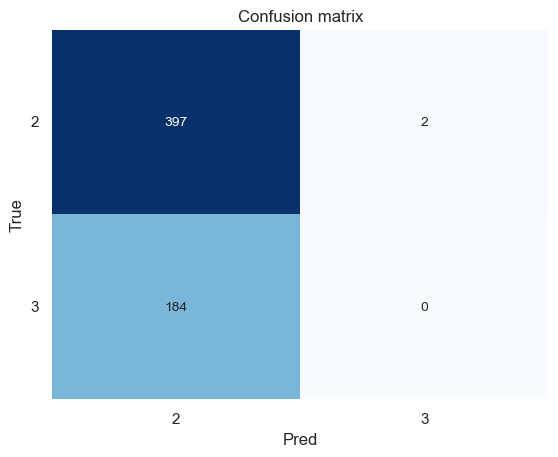

In [101]:
# Confusion Matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, xticklabels=[2,3])
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=[2,3], rotation=0)
plt.show()

---

In [102]:
# Lista de Parâmetros do GradientBoostingClassifier
model = ensemble.GradientBoostingClassifier()
model.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [103]:
# Definir as combinações de hiperparâmetros a testar
param_dic = {
    'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],          # weighting factor for the corrections by new trees when added to the model
    'n_estimators':[50, 100,250,500,750,1000,1250,1500,1750],  # number of trees added to the model
    'max_depth':[2,3,4,5,6,7],                                 # maximum depth of the tree
    'min_samples_split':[2,4,6,8,10,20,40,60,100],             # sets the minimum number of samples to split
    'min_samples_leaf':[1,3,5,7,9],                            # the minimum number of samples to form a leaf
    'max_features':['sqrt','log2',2,3,4,5,6,7],                # square root of features is usually a good starting point
    'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]                 # the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.
}

# GradientBoostingClassifier 
model = ensemble.GradientBoostingClassifier()
random_search = model_selection.RandomizedSearchCV(model, 
                                                   param_distributions=param_dic,
                                                   n_iter=20,
                                                   scoring='roc_auc').fit(X_train, y_train)

print("Best Model parameters:", random_search.best_params_)
print("Best Model mean AUC:", random_search.best_score_)

model_best = random_search.best_estimator_

Best Model parameters: {'subsample': 0.8, 'n_estimators': 1000, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 3, 'max_depth': 6, 'learning_rate': 0.001}
Best Model mean AUC: 0.5523319615801582


In [104]:
# Treinar o modelo com o conjunto de treino
model_best.fit(X_train, y_train)

# Testar o modelo com o conjunto de teste
predicted_prob = model_best.predict_proba(X_test)[:,1]
predicted = model_best.predict(X_test)

# Calcular as métricas de desempenho
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
recall = metrics.recall_score(y_test, predicted, average='weighted')
precision = metrics.precision_score(y_test, predicted, average='weighted')
f1_score = metrics.f1_score(y_test, predicted, average='weighted')

# Imprimir as métricas de desempenho
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("F1-Score:", round(f1_score,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.68
Auc: 0.57
Recall (all 1s predicted right): 0.68
Precision (confidence when predicting a 1): 0.47
F1-Score: 0.56
Detail:
              precision    recall  f1-score   support

           2       0.68      1.00      0.81       399
           3       0.00      0.00      0.00       184

    accuracy                           0.68       583
   macro avg       0.34      0.50      0.41       583
weighted avg       0.47      0.68      0.56       583



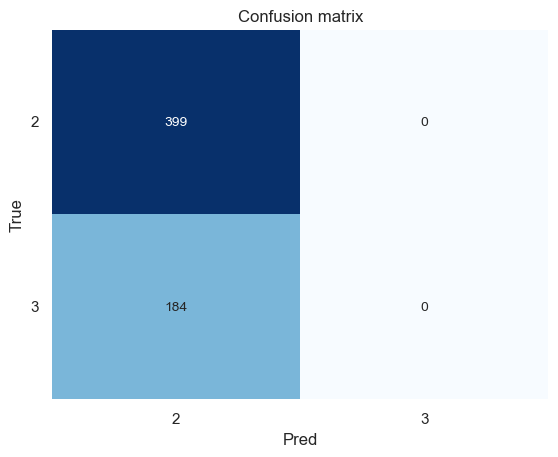

In [105]:
# Confusion Matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, xticklabels=[2,3])
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=[2,3], rotation=0)
plt.show()

---

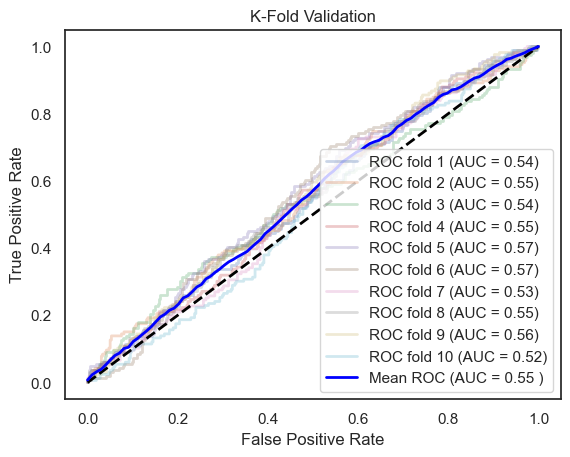

In [106]:
### now we validate the model using a k-fold cross-validation, 
## that is, a procedure that consists in splitting the data k times into train and validation sets 
## and for each split the model is trained and tested
## validation set = subset from train set

#### StratifiedKFold -> Quando as classes não é equilibrada (garante que os folds têm 0 e 1)
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    fpr, tpr, t = metrics.roc_curve(y_train[test], prediction[:, 1], pos_label=3)
    tprs.append(scipy.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1


##### plot a ROC curve for every fold (true positive rate vs false positive rate) 
## illustrates how the ability of a binary classifier changes as its discrimination threshold is varied
## AUC - area under the ROC curve - probability that the classifier will rank 
## a randomly chosen positive observation (Y=1) higher than a randomly chosen negative one (Y=0). 
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation')
plt.legend(loc="lower right")
plt.show()

# <a class='anchor' id='4'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#67C7ED, #0371B1,#0A6394); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 34px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>4 | Evaluation</b></h1></center>
</div>

In [107]:
# Vamos usar o modelo 'Random Forest' com todas as variáveis 
rf = RandomForestClassifier(n_estimators = 50, criterion = 'gini')
rf.fit(X_train, y_train)

# Treinar o modelo
rf.fit(X_train, y_train)

# Testar o modelo
predicted_prob = rf.predict_proba(X_test)[:,1]
predicted = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

### Explainability

- Lime package build an explainer

In [108]:
# Exemplo: escolher um Valor Real do Conjunto de Teste e o Valor Previsto correspondente
print("True:", y_test[20], "--> Pred:", predicted[20], "| Prob:", np.max(predicted_prob[16]))

True: 3 --> Pred: 2 | Prob: 0.24


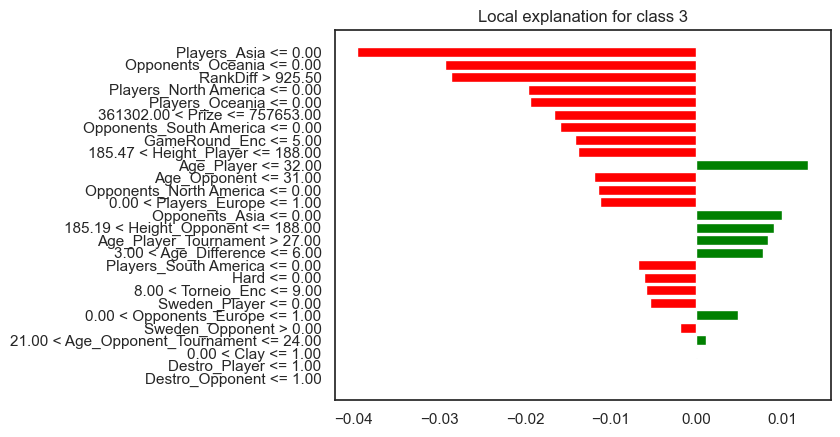

In [109]:
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train, feature_names=X_names3, 
                                              class_names=np.unique(y_train), mode="classification")
explained = explainer.explain_instance(X_test[20], rf.predict_proba, num_features=len(X_names3))
explained.as_pyplot_figure();

> Uma vez que os resultados preditivos do modelo não alcançaram um desempenho satisfatório, não considerámos a análise da ***Explainability*** interessante de fazer, razão pela qual não foi referida no relatório, permanecendo apenas no *notebook*.

---